<a href="https://colab.research.google.com/github/harvey-py/COMP3010/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [1]:
# Basics
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

# Regression
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# RF
from sklearn.ensemble import RandomForestRegressor

# XGB
import xgboost as xgb

# NN
import torch
import tensorflow


## Config

In [2]:
# working_dir = "~/Documents/GitHub/COMP3010/Assignment/Data/"

# train_dir = os.path.join(working_dir, "train.csv")
# test_dir = os.path.join(working_dir, "test.csv")

train_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/train.csv"
test_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/test.csv"

## Importing Data

In [3]:
raw_data = pd.read_csv(train_dir)
raw_data.rename(columns = {"Target Pressure (bar)": "tgt_pressure"}, inplace = True)

In [281]:
raw_test_data = pd.read_csv(test_dir)
raw_test_data.rename(columns = {"Target Pressure (bar)": "tgt_pressure"}, inplace = True)

# Exploratory Analysis

## Variables

In [5]:
raw_data.columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'tgt_pressure'],
      dtype='object')

In [6]:
raw_data

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure
0,3203.0,7.32,0.42,2.42,5.39,1.00,1.79,0.60,524.61,354.49,...,Superheated,37.9,-1.0,152.0,18.0,2.0,12.15,7.90,10.7,0.199929
1,3204.0,7.18,0.42,2.39,5.39,1.01,1.81,0.59,522.80,354.31,...,Superheated,37.9,-1.0,152.0,19.0,3.0,12.50,-2.95,-1.9,0.435681
2,3205.0,7.32,0.41,2.39,5.38,1.00,1.78,0.62,523.00,354.59,...,Superheated,37.9,-1.0,152.0,20.0,3.0,12.50,-2.95,4.4,0.264031
3,3206.0,7.26,0.42,2.40,5.41,1.00,1.81,0.61,522.35,354.37,...,Superheated,37.9,-1.0,152.0,21.0,3.0,12.50,-2.95,10.7,0.270576
4,3207.0,7.32,0.42,2.40,5.41,1.02,1.79,0.62,522.98,354.33,...,Superheated,37.9,-1.0,152.0,22.0,4.0,12.50,-2.70,11.0,0.204675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,10244.0,36.91,0.64,1.58,9.39,0.58,1.01,0.22,442.31,299.28,...,Subcooled,37.9,NaN,152.0,12.0,2.0,18.75,-0.80,9.7,0.372254
10046,12758.0,16.44,0.55,0.80,5.58,1.99,1.60,0.82,293.54,285.02,...,Subcooled,37.9,-1.0,152.0,15.0,2.0,15.35,4.60,3.8,0.294822
10047,9438.0,36.26,0.57,2.38,2.62,2.80,0.60,1.19,349.75,418.53,...,Subcooled,37.9,-1.0,152.0,16.0,2.0,6.15,7.40,-1.0,1.392541
10048,8689.0,14.27,0.50,2.21,8.40,2.58,1.62,1.40,288.61,396.96,...,Superheated,37.9,-1.0,152.0,23.0,4.0,17.70,3.40,9.8,0.204026


## Plots

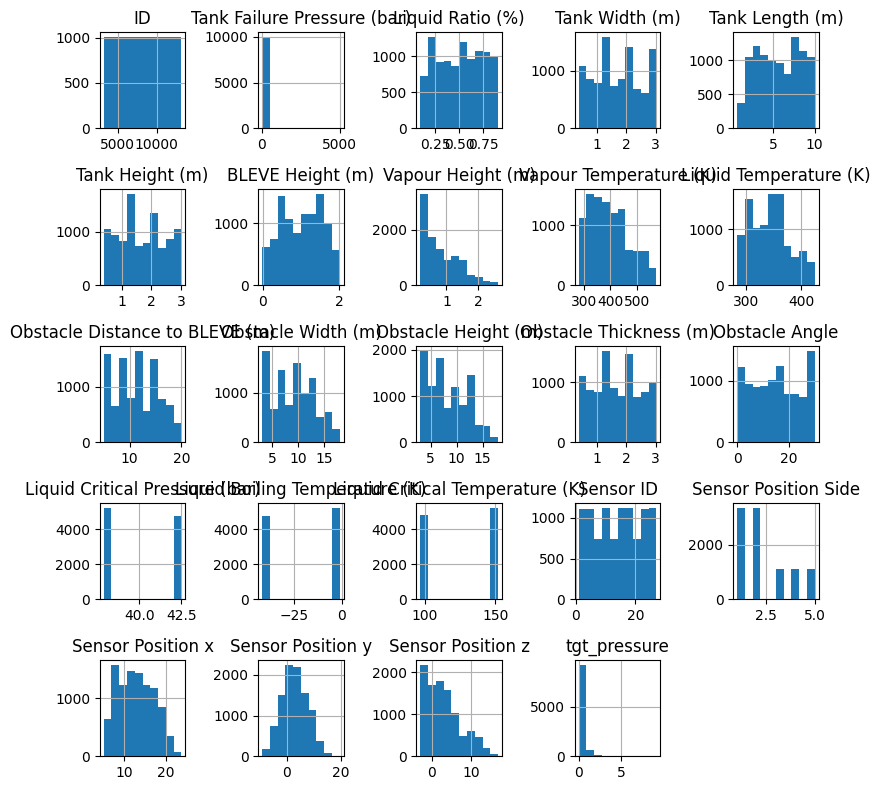

In [7]:
raw_data.hist(figsize = (8,8))
plt.tight_layout()
plt.show()

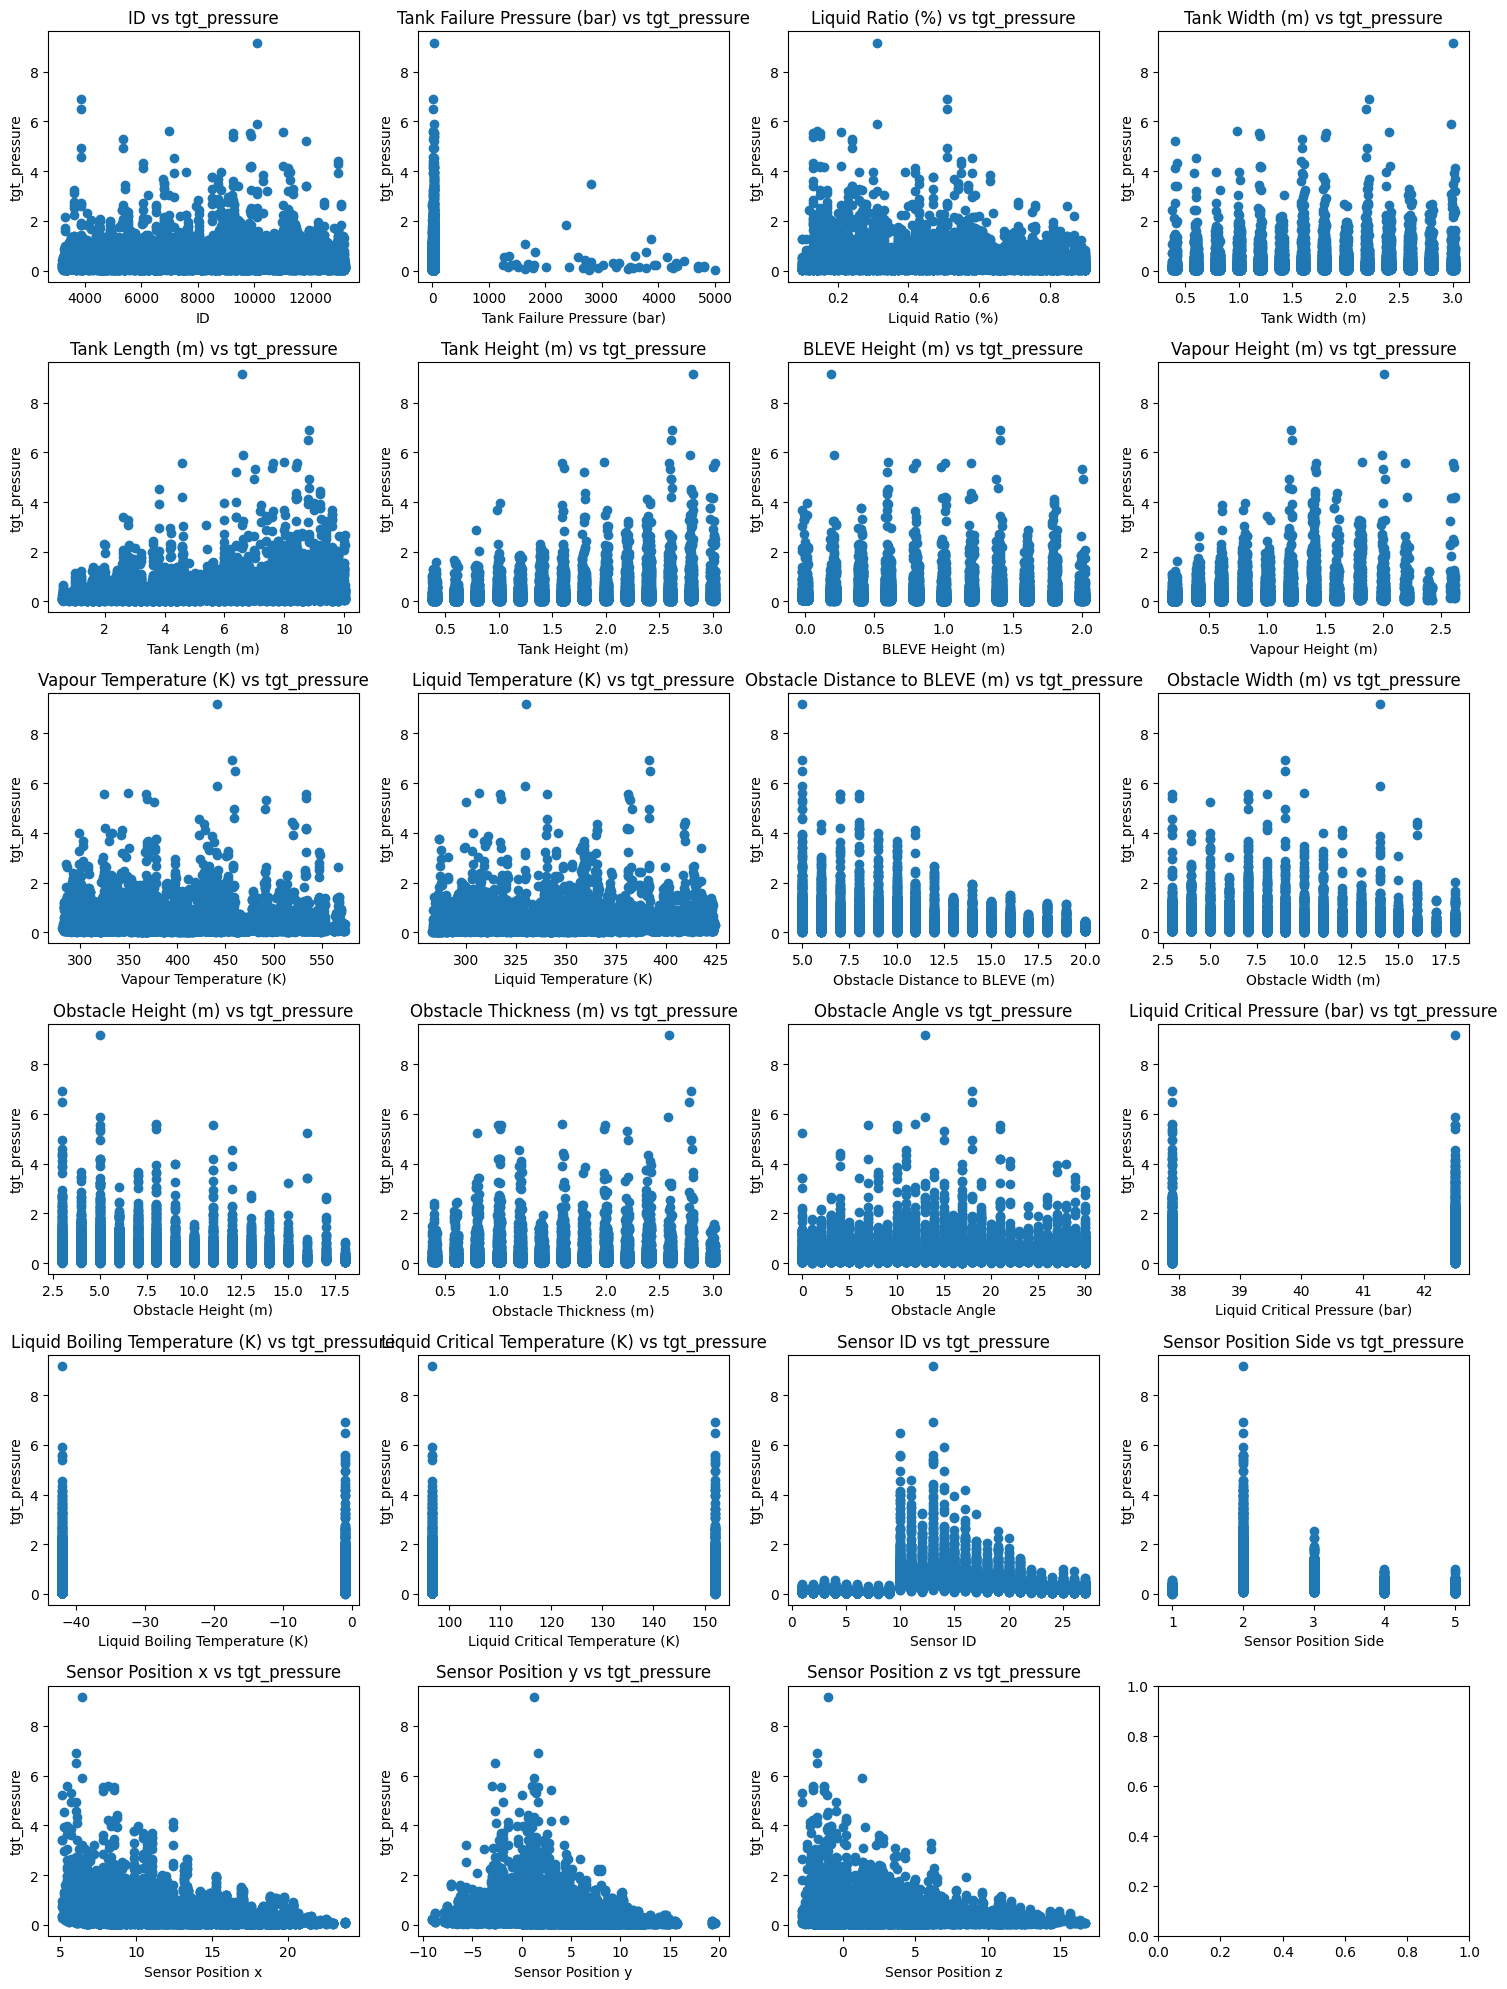

In [8]:
raw_data_num = raw_data.select_dtypes(include=[np.number])

n_cols = 4
n_rows = int(len(raw_data_num.columns) / n_cols) + (len(raw_data_num.columns) % n_cols > 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for i, col_name in enumerate(raw_data_num.columns):
    if col_name != "tgt_pressure":
        ax = axs[i//n_cols, i%n_cols]
        ax.scatter(raw_data_num[col_name], raw_data_num["tgt_pressure"])
        ax.set_title(f"{col_name} vs tgt_pressure")
        ax.set_xlabel(col_name)
        ax.set_ylabel("tgt_pressure")

plt.tight_layout()
plt.show()

In [9]:
raw_data_num.corr().style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure
ID,1.000000,-0.001820,0.036746,-0.025398,-0.032712,0.072045,-0.016855,-0.001992,-0.056787,-0.072574,-0.045747,-0.039398,0.082944,0.034338,-0.051896,0.042698,-0.044007,-0.042583,0.000572,0.000837,-0.048307,-0.042224,0.044329,0.010547
Tank Failure Pressure (bar),-0.001820,1.000000,0.004925,-0.008360,-0.009489,0.008243,0.014730,-0.004275,-0.003012,-0.015516,-0.002404,0.009887,0.015341,-0.007164,-0.007683,-0.000975,0.000860,0.000973,0.004141,0.006835,-0.005223,-0.005038,-0.000902,0.003051
Liquid Ratio (%),0.036746,0.004925,1.000000,0.022278,0.205378,0.099394,0.081826,-0.638602,0.000439,0.016656,0.072357,-0.018873,0.041712,-0.018672,0.066159,0.026168,-0.025409,-0.025144,-0.002198,-0.002205,0.071988,0.057932,0.050984,-0.137861
Tank Width (m),-0.025398,-0.008360,0.022278,1.000000,-0.100841,-0.058788,0.012053,-0.054934,-0.013490,0.020530,0.073258,0.054792,0.023180,0.015090,0.063194,0.001629,-0.002363,-0.001209,0.002523,0.002423,0.156483,0.036667,0.011221,0.051085
Tank Length (m),-0.032712,-0.009489,0.205378,-0.100841,1.000000,-0.095202,-0.041280,-0.202523,-0.061445,0.003399,0.044287,-0.104524,-0.102135,-0.001585,-0.095067,0.021468,-0.021170,-0.021339,-0.000746,-0.000705,0.037612,-0.027884,-0.030712,0.164278
Tank Height (m),0.072045,0.008243,0.099394,-0.058788,-0.095202,1.000000,-0.055049,0.618088,0.064139,-0.032707,0.009374,-0.091571,-0.138902,-0.021552,0.045627,-0.010961,0.011524,0.011982,-0.002509,-0.002489,0.000033,0.031918,-0.100881,0.197222
BLEVE Height (m),-0.016855,0.014730,0.081826,0.012053,-0.041280,-0.055049,1.000000,-0.113938,-0.019803,-0.040783,0.063497,0.022645,-0.042900,-0.027297,0.064150,-0.083370,0.084111,0.083885,0.001973,0.002215,0.066997,0.043700,-0.148489,-0.060886
Vapour Height (m),-0.001992,-0.004275,-0.638602,-0.054934,-0.202523,0.618088,-0.113938,1.000000,0.048949,0.021988,-0.055175,-0.068498,-0.152628,-0.043910,-0.018694,-0.020398,0.019873,0.020126,-0.000553,-0.000623,-0.064416,-0.021613,-0.123540,0.271649
Vapour Temperature (K),-0.056787,-0.003012,0.000439,-0.013490,-0.061445,0.064139,-0.019803,0.048949,1.000000,0.135883,-0.030712,-0.026292,0.014998,-0.063102,0.010160,-0.354249,0.354453,0.353738,0.002841,0.003243,-0.032366,0.004267,0.007140,-0.003626
Liquid Temperature (K),-0.072574,-0.015516,0.016656,0.020530,0.003399,-0.032707,-0.040783,0.021988,0.135883,1.000000,-0.060474,-0.016144,-0.063809,-0.071763,-0.001221,-0.349224,0.348795,0.348837,-0.000439,-0.000297,-0.057272,-0.031621,-0.028045,0.064178


In [10]:
raw_data_num.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure
tgt_pressure,0.010547,0.003051,-0.137861,0.051085,0.164278,0.197222,-0.060886,0.271649,-0.003626,0.064178,-0.206157,-0.069029,-0.113279,-0.014092,-0.031050,0.044658,-0.044785,-0.044814,0.063817,-0.006387,-0.281315,-0.188997,-0.195234,1.000000


In [11]:
raw_data_num["Volume"] = raw_data_num["Tank Length (m)"] * raw_data_num["Tank Height (m)"]

In [12]:
## TURN OFF NIGHT READER WHEN VIEWING CORRPLOTS
raw_data_num.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure,Volume
tgt_pressure,0.010547,0.003051,-0.137861,0.051085,0.164278,0.197222,-0.060886,0.271649,-0.003626,0.064178,-0.206157,-0.069029,-0.113279,-0.014092,-0.031050,0.044658,-0.044785,-0.044814,0.063817,-0.006387,-0.281315,-0.188997,-0.195234,1.000000,0.280196


# Data Preprocessing

## Missing Values

In [13]:
raw_nans = raw_data[raw_data.isna().any(axis = 1)]
print(f"{len(raw_nans)} points with NaNs out of {len(raw_data)} ({len(raw_nans)/len(raw_data)*100:.3f}%)")

112 points with NaNs out of 10050 (1.114%)


In [14]:
# 1: Removing NaNs
raw_data1 = raw_data.dropna()

## Outliers

In [15]:
outlier_df = raw_data1.drop("ID", axis = 1).select_dtypes(exclude=['object']).copy()

<Axes: >

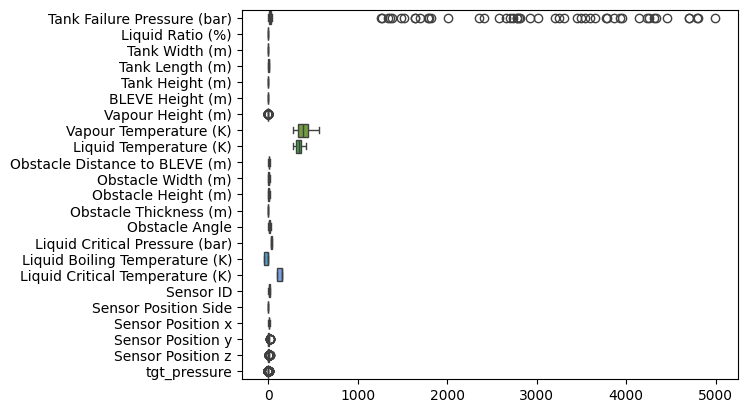

In [16]:
sns.boxplot(outlier_df, orient = "h")

It is apparent that "Tank Failure Pressure" has a large amount of outliers. We'll investigate this further below

In [17]:
outlier_count = len(raw_data1.query("`Tank Failure Pressure (bar)` > 1000"))

In [18]:
outlier_df.sort_values("Tank Failure Pressure (bar)", ascending = False, inplace = True)
display(outlier_df.head())
display(outlier_df.iloc[outlier_count - 3 : outlier_count + 3])

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure
4634,4995.616406,0.73,1.60,8.02,2.39,0.79,0.59,362.35,300.93,11.0,...,8.0,42.5,-42.0,96.7,8.0,1.0,14.65,7.4,5.4,0.042548
1401,4807.927645,0.16,0.81,1.02,2.00,1.21,1.61,403.73,330.31,17.0,...,28.0,42.5,-42.0,96.7,15.0,2.0,17.35,9.0,5.8,0.130719
1198,4796.894538,0.53,1.19,7.58,2.41,1.38,1.18,407.90,306.97,8.0,...,10.0,42.5,-42.0,96.7,1.0,1.0,9.85,-0.4,-1.8,0.177109
9558,4703.637237,0.55,0.78,5.62,1.99,1.60,0.79,293.89,285.08,15.0,...,17.0,37.9,-1.0,152.0,18.0,2.0,15.35,9.9,3.8,0.177894
9375,4702.296095,0.14,2.81,1.02,1.59,0.82,1.41,368.05,332.95,6.0,...,15.0,42.5,-42.0,96.7,24.0,4.0,8.40,8.4,10.6,0.120019


,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure
1738,1342.242706,0.20,1.21,6.22,1.01,0.21,0.78,444.49,405.76,5.0,...,18.0,37.9,-1.0,152.0,1.0,1.0,8.65,-0.70,-0.4,0.147148
2484,1270.544969,0.85,2.41,5.58,2.38,0.18,0.40,357.61,378.31,11.0,...,18.0,37.9,-1.0,152.0,18.0,2.0,12.15,5.90,7.4,0.546492
4647,1257.523808,0.73,1.61,7.98,2.41,0.81,0.62,362.27,301.04,11.0,...,8.0,42.5,-42.0,96.7,21.0,3.0,13.20,-4.45,11.7,0.236112
5690,42.180000,0.43,1.80,9.80,1.40,0.41,0.82,418.83,297.97,10.0,...,19.0,42.5,-42.0,96.7,11.0,2.0,10.85,1.60,2.2,1.965685
5696,42.160000,0.43,1.80,9.78,1.42,0.39,0.82,419.09,298.10,10.0,...,19.0,42.5,-42.0,96.7,17.0,2.0,10.85,5.20,2.2,1.428485
5700,42.120000,0.43,1.82,9.79,1.38,0.39,0.78,419.70,298.00,10.0,...,19.0,42.5,-42.0,96.7,21.0,3.0,12.30,1.35,5.0,0.877835


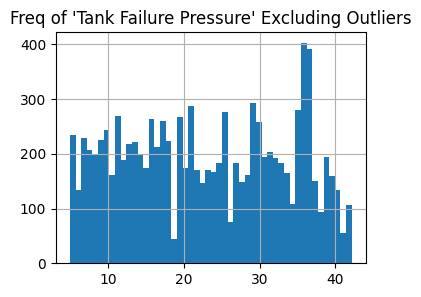



## Smallest 10 values ##


9406    4.92
9422    4.93
9425    4.96
9410    4.97
9417    4.98
9432    5.00
9427    5.00
9421    5.04
5423    5.05
9429    5.06
Name: Tank Failure Pressure (bar), dtype: float64

In [19]:
outlier_df.iloc[outlier_count:]["Tank Failure Pressure (bar)"].hist(bins = 50, figsize = (4,3))
plt.title("Freq of 'Tank Failure Pressure' Excluding Outliers")
plt.show()

print("\n\n## Smallest 10 values ##")
display(outlier_df["Tank Failure Pressure (bar)"].nsmallest(10))

We can see that 1) the outlier values are in the range [1000,5000] and that all the remaining values are roughly between 4 and 40. If we consider for the fact that another popular unit of measurement for pressure, kPa, is 100x the value of bar, these outlier values now make sense and don't appear to be outlier values anymore. Given that these sort of errors are present throughout the data (e.g. use of C instead of K in temperature, mentioned later) and the fact that the rest of the values for these "outlier" data points appear to be reasonable, it appears to be fair to assume that these values are simple recording errors and should be divided by 100, rather than removed.

In [20]:
outlier_df.loc[outlier_df['Tank Failure Pressure (bar)'] > 1000, 'Tank Failure Pressure (bar)'] /= 100

<Axes: >

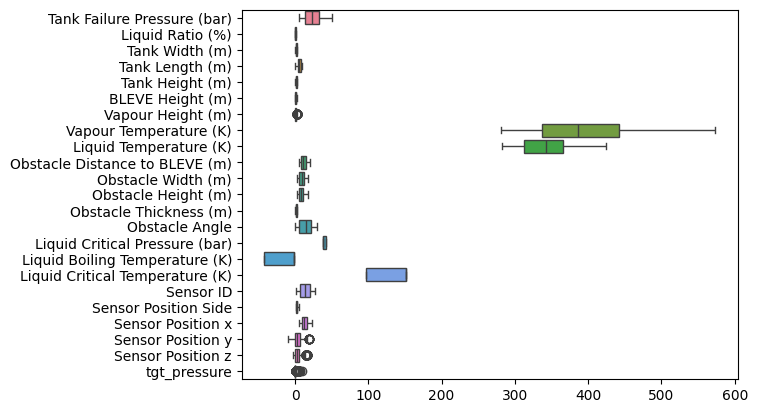

In [21]:
sns.boxplot(outlier_df, orient = "h")

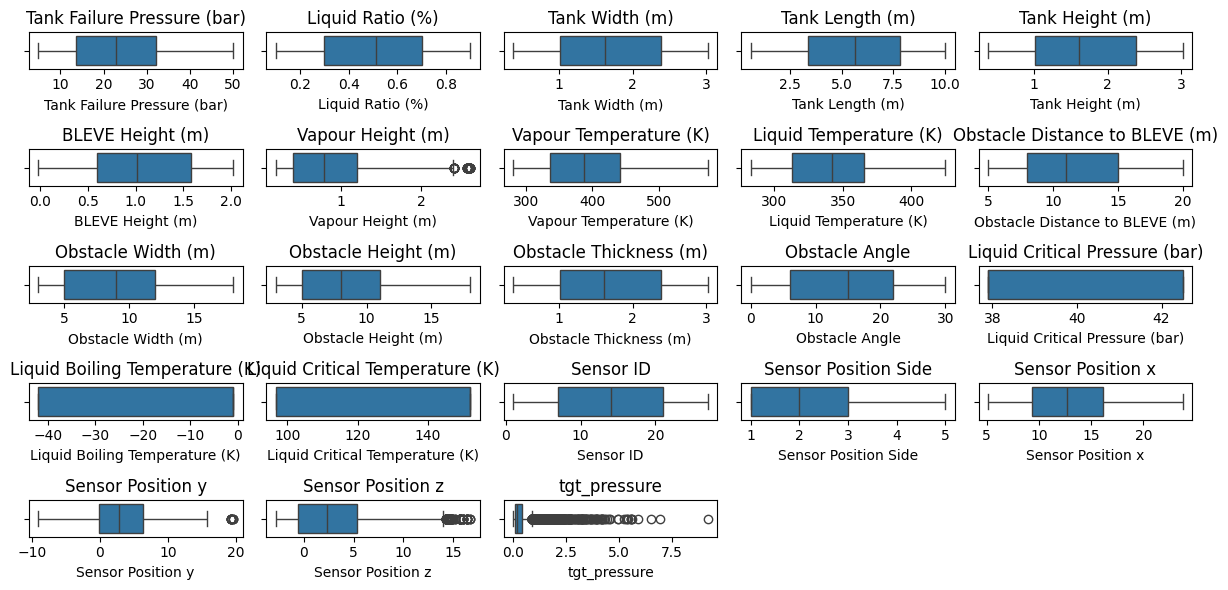

In [28]:
fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(12, 6))
axes = axes.flatten()

# Plot each boxplot in a separate subplot
for i, column in enumerate(outlier_df.columns):
    sns.boxplot(x=outlier_df[column], ax=axes[i])
    axes[i].set_title(f'{column}')

for j in range(len(outlier_df.columns), len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

We can see that most columns do not contain outliers in the strict "1.5 * IQR" sense; only "Vapour Height (m)", "Sensor Position y", "Sensor Position z" and "tgt_pressure" do. Below are the histograms for each of these columns.

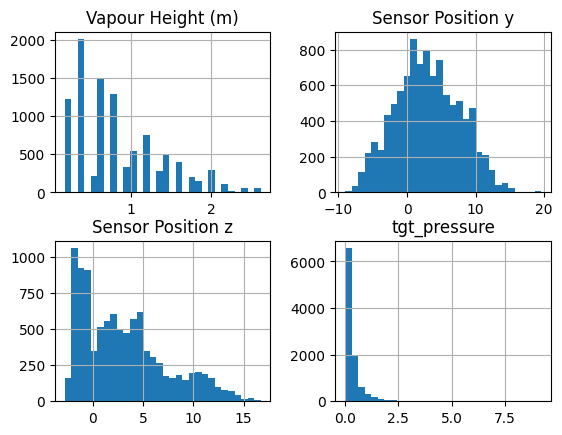

In [30]:
outlier_df[["Vapour Height (m)", "Sensor Position y", "Sensor Position z", "tgt_pressure"]].hist(bins = 30)
plt.show()

In [35]:
outlier_df.query("`Sensor Position y` > 18").sort_index()

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure
5443,8.90,0.37,1.20,3.20,2.21,0.41,1.42,352.88,343.07,19.0,...,30.0,42.5,-42.0,96.7,7.0,1.0,21.45,19.30,-0.9,0.024432
5444,8.90,0.37,1.22,3.20,2.21,0.39,1.39,351.56,343.28,19.0,...,30.0,42.5,-42.0,96.7,8.0,1.0,21.45,19.30,1.4,0.027739
5445,8.85,0.36,1.22,3.20,2.19,0.41,1.41,352.50,342.98,19.0,...,30.0,42.5,-42.0,96.7,9.0,1.0,21.45,19.30,3.7,0.034894
5452,8.88,0.36,1.22,3.21,2.21,0.40,1.40,351.55,343.11,19.0,...,30.0,42.5,-42.0,96.7,16.0,2.0,19.55,19.30,-0.9,0.161822
5453,8.88,0.37,1.21,3.19,2.21,0.42,1.41,351.88,342.87,19.0,...,30.0,42.5,-42.0,96.7,17.0,2.0,19.55,19.30,1.4,0.161360
5454,8.82,0.37,1.19,3.19,2.22,0.41,1.42,350.64,343.46,19.0,...,30.0,42.5,-42.0,96.7,18.0,2.0,19.55,19.30,3.7,0.140998
5460,8.99,0.37,1.19,3.21,2.22,0.42,1.38,351.33,343.17,19.0,...,30.0,42.5,-42.0,96.7,24.0,4.0,20.50,19.30,4.0,0.075243
5461,8.88,0.37,1.20,3.18,2.18,0.41,1.39,351.03,342.86,19.0,...,30.0,42.5,-42.0,96.7,25.0,5.0,20.50,19.55,-0.9,0.054992
5462,9.05,0.37,1.18,3.21,2.20,0.41,1.39,351.57,343.49,19.0,...,30.0,42.5,-42.0,96.7,26.0,5.0,20.50,19.55,1.4,0.054852
5463,8.82,0.37,1.20,3.21,2.20,0.39,1.41,351.48,344.13,19.0,...,30.0,42.5,-42.0,96.7,27.0,5.0,20.50,19.55,3.7,0.065084


We can see that the first 3 variables distributions appear to be normal. It appears that all the outlier values for "Sensor Position y" come from the same event, so the "outliers" appear to instead be reasonable values that should not be excluded from our data. 

However, the data for tgt_pressure appears to be more prone to outliers (as there is a large gap in the middle and right of the graph). This is looked into further below

<Axes: >

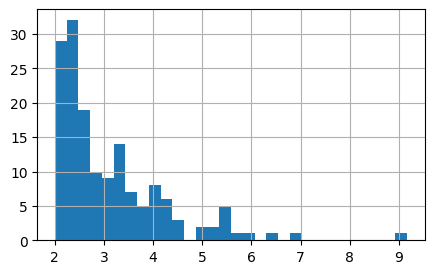

In [45]:
outlier_df.query("`tgt_pressure` > 2")["tgt_pressure"].hist(bins = 30, figsize = (5,3))

In [55]:
outlier_df.sort_values("tgt_pressure", ascending = False).head(10).T

,6907,670,667,6908,3775,7822,6661,6040,6664,6043
Tank Failure Pressure (bar),26.150000,25.570000,25.600000,26.270000,15.510000,18.080000,26.640000,34.130000,26.710000,34.070000
Liquid Ratio (%),0.310000,0.510000,0.510000,0.310000,0.140000,0.210000,0.150000,0.130000,0.150000,0.130000
Tank Width (m),3.000000,2.220000,2.190000,2.980000,0.980000,2.400000,1.190000,1.820000,1.200000,1.810000
Tank Length (m),6.580000,8.810000,8.780000,6.610000,7.990000,4.590000,8.420000,7.610000,8.400000,7.600000
Tank Height (m),2.820000,2.620000,2.610000,2.790000,1.980000,2.590000,3.020000,1.590000,3.000000,1.610000
BLEVE Height (m),0.190000,1.410000,1.410000,0.210000,0.600000,1.200000,1.010000,0.800000,0.980000,0.780000
Vapour Height (m),2.010000,1.200000,1.210000,1.990000,1.820000,2.190000,2.600000,1.420000,2.610000,1.410000
Vapour Temperature (K),440.780000,456.360000,459.640000,440.770000,348.900000,323.970000,532.950000,368.170000,532.930000,368.500000
Liquid Temperature (K),329.900000,391.820000,391.920000,329.350000,306.300000,340.390000,381.330000,317.010000,381.800000,317.530000
Obstacle Distance to BLEVE (m),5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,8.000000,7.000000,8.000000,7.000000


This data doesn't appear to be too unreasonable - they instead appear to be natural variations in the data, notably when the "tank volume" is large - arguably aside from the value of 9.

In [61]:
outlier_df.sort_index(inplace = True)
outlier_df.loc[6904:6910][["Sensor ID", "tgt_pressure"]].T

,6904,6905,6906,6907,6908,6909,6910
Sensor ID,10.000000,11.000000,12.000000,13.000000,14.000000,15.00000,16.000000
tgt_pressure,3.221491,2.524463,1.529262,9.170477,5.893072,3.08953,2.263237


Whilst the value of 9.17 from sensor 13 does appear to be quite large, we must consider that it's 1) in the front and middle of the obstacle, and 2) the surrounding 3 sensors (10, 14 and 16) also have abnormally large tgt_pressure values (of 3.22, 5.89 and 2.26 respectively). There is thus not considerable doubt that this value is erroneous, or influenced by measurement error, errors when entering data, poor sampling etc. and so it will not be removed.

In [64]:
# Unused
def remove_outliers_IQR(df, cols, quantile = 0.25, mult = 1.5):
    for col in cols:
        Q1 = df[col].quantile(quantile)
        Q3 = df[col].quantile(1-quantile)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - mult * IQR
        upper_bound = Q3 + mult * IQR

        n_prior = len(df)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        n_after = len(df)
        
        print(f"##### {col} #####\nBounds: {lower_bound:.5f} - {upper_bound:.5f} (IQR: {IQR:.5f})\nn(removed): {n_prior - n_after}\n")
        
    return df

# raw_data2 = remove_outliers_IQR(raw_data1, ["Tank Failure Pressure (bar)"])

In [104]:
raw_data2 = raw_data1.sort_values("ID").reset_index(drop = True).copy()
raw_data2.loc[raw_data2['Tank Failure Pressure (bar)'] > 1000, 'Tank Failure Pressure (bar)'] /= 100

## Data Encoding

In [116]:
# 3.1: Encoding Status Column
raw_data2["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [117]:
raw_data2.loc[raw_data2['Status'].str.contains('sub|cool', case=False), 'Status'] = 'Subcooled'
raw_data2.loc[raw_data2['Status'].str.contains('super|heat', case=False), 'Status'] = 'Superheated'

In [118]:
raw_data2["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [369]:
temp = pd.concat([raw_data2, pd.get_dummies(raw_data2['Status'], drop_first=True).astype(int)], axis=1)
raw_data3 = temp.drop(columns = "Status").rename(columns = {"Superheated": "Superheated_status"})

temp = pd.concat([raw_test_data, pd.get_dummies(raw_test_data['Status'], drop_first=True).astype(int)], axis=1)
raw_test_data2 = temp.drop(columns = "Status").rename(columns = {"Superheated": "Superheated_status"})

In [370]:
raw_data2[["Liquid Critical Pressure (bar)", "Liquid Boiling Temperature (K)", "Liquid Critical Temperature (K)"]].drop_duplicates()

,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K)
0,37.9,-1.0,152.0
63,42.5,-42.0,96.7


In [371]:
dummies = pd.get_dummies(raw_data3['Liquid Critical Pressure (bar)'], drop_first=False)
dummies.columns = ['37.9', '42.5']
dummy_col = dummies['42.5'].rename(f"Liquid Critical Pressure (bar)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Critical Pressure (bar)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_data3['Liquid Boiling Temperature (K)'], drop_first=False)
dummies.columns = ['-42', '-1']
dummy_col = dummies['-42'].rename(f"Liquid Boiling Temperature (K)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Boiling Temperature (K)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_data3['Liquid Critical Temperature (K)'], drop_first=False)
dummies.columns = ['152.0', '96.7']
dummy_col = dummies['152.0'].rename(f"Liquid Critical Temperature (K)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Critical Temperature (K)', axis=1), dummy_col], axis=1)

In [372]:
dummies = pd.get_dummies(raw_test_data2['Liquid Critical Pressure (bar)'], drop_first=False)
dummies.columns = ['37.9', '42.5']
dummy_col = dummies['42.5'].rename(f"Liquid Critical Pressure (bar)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Critical Pressure (bar)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_test_data2['Liquid Boiling Temperature (K)'], drop_first=False)
dummies.columns = ['-42', '-1']
dummy_col = dummies['-42'].rename(f"Liquid Boiling Temperature (K)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Boiling Temperature (K)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_test_data2['Liquid Critical Temperature (K)'], drop_first=False)
dummies.columns = ['152.0', '96.7']
dummy_col = dummies['152.0'].rename(f"Liquid Critical Temperature (K)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Critical Temperature (K)', axis=1), dummy_col], axis=1)

In [373]:
# Creating a lookup for the properties of each substance (there are only 2 distinct substance present; we will denote them 0 and 1). This table will allow us to view their properties later
substance_properties = raw_data2[["Liquid Critical Pressure (bar)", "Liquid Boiling Temperature (K)", "Liquid Critical Temperature (K)"]].drop_duplicates()
substance_properties = substance_properties.rename(index = {substance_properties.index[1]: 1})

## 'Events'

Before we continue, we should establish that the data is grouped into indiviudal explosions. 

Looking at the below example, we can clearly see that the first 4 below belong to the same explosion due to the similarity in values (especially the substance properties), they are just measurements from different sensors - and likewise for the last 4 measurements.

In [374]:
raw_data4 = raw_data3.copy()

In [375]:
raw_data4.iloc[33:41]

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure,Superheated_status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K)
33,3236.0,30.64,0.81,1.59,4.41,0.80,1.19,0.20,363.59,407.41,...,24.0,4.0,10.30,4.40,12.8,0.102690,0,0,0,0
34,3237.0,30.59,0.81,1.59,4.39,0.78,1.20,0.18,363.66,407.68,...,25.0,5.0,10.30,4.65,-1.1,0.149726,0,0,0,0
35,3238.0,30.46,0.80,1.60,4.42,0.79,1.20,0.21,363.64,407.02,...,26.0,5.0,10.30,4.65,5.7,0.100412,0,0,0,0
36,3239.0,30.59,0.80,1.59,4.42,0.79,1.18,0.19,364.08,407.56,...,27.0,5.0,10.30,4.65,12.5,0.103633,0,0,0,0
37,3240.0,24.11,0.66,2.78,8.38,0.78,1.60,0.19,461.49,363.16,...,1.0,1.0,20.05,1.40,-1.5,0.076563,0,0,0,0
38,3241.0,24.05,0.66,2.81,8.38,0.78,1.58,0.21,461.70,363.94,...,2.0,1.0,20.05,1.40,1.3,0.077139,0,0,0,0
39,3242.0,24.14,0.66,2.80,8.41,0.81,1.61,0.18,462.31,363.63,...,3.0,1.0,20.05,1.40,4.1,0.105216,0,0,0,0
40,3243.0,23.90,0.65,2.81,8.40,0.81,1.62,0.20,461.80,363.41,...,4.0,1.0,20.05,4.20,-1.5,0.055952,0,0,0,0


It however makes no sense that values which should be constant (e.g. "tank width") are different between measurements. This would be artificially induced noise that will be removed for the sake of consistency. This noise also leads to nonsensical values - for example, where the "Vapour Height" (the height of the vapour in the tank) exceeds the "Tank Height" as can be seen below.

In [376]:
raw_data4.query("`Tank Height (m)` < `Vapour Height (m)`")[["Vapour Height (m)","Tank Height (m)"]].head()

,Vapour Height (m),Tank Height (m)
1353,0.82,0.80
1355,0.82,0.81
1361,0.81,0.78
1364,0.81,0.79
1365,0.82,0.79


To deal with this, we'll separate the data points into their separate events by adding an "event_num". We'll then set the value of appropriate parameters to the median of all the different values for that event - we'll avoid using mean as this is prone to outliers.

In [377]:
event_num = 1
prev_id = raw_data4.loc[0, "Sensor ID"]

event_nums = []

for index, row in raw_data4.iterrows():
    curr_id = row["Sensor ID"]
    if curr_id < prev_id:
        event_num += 1 
    
    event_nums.append(event_num)
    prev_id = curr_id

raw_data4.loc[:,"event_num"] = event_nums

We will now remove the noise from the columns which should be the same across events

In [378]:
raw_data4.T

,0,1,2,3,4,5,6,7,8,9,...,9928,9929,9930,9931,9932,9933,9934,9935,9936,9937
ID,3203.000000,3204.000000,3205.000000,3206.000000,3207.000000,3208.000000,3209.000000,3210.00000,3211.000000,3212.000000,...,13194.000000,13195.000000,13196.000000,13197.000000,13198.000000,13199.000000,13200.000000,13201.000000,13201.000000,13202.000000
Tank Failure Pressure (bar),7.320000,7.180000,7.320000,7.260000,7.320000,7.220000,7.480000,7.28000,7.400000,37.841099,...,18.180000,18.120000,18.270000,18.430000,18.090000,18.180000,18.210000,18.410000,18.410000,18.220000
Liquid Ratio (%),0.420000,0.420000,0.410000,0.420000,0.420000,0.410000,0.410000,0.41000,0.420000,0.420000,...,0.570000,0.570000,0.570000,0.570000,0.570000,0.570000,0.570000,0.570000,0.570000,0.570000
Tank Width (m),2.420000,2.390000,2.390000,2.400000,2.400000,2.390000,2.390000,2.38000,2.400000,2.400000,...,1.980000,1.990000,2.020000,1.980000,2.000000,1.980000,1.980000,1.990000,1.990000,2.000000
Tank Length (m),5.390000,5.390000,5.380000,5.410000,5.410000,5.400000,5.400000,5.40000,5.390000,5.400000,...,7.190000,7.220000,7.180000,7.220000,7.190000,7.190000,7.190000,7.190000,7.190000,7.210000
Tank Height (m),1.000000,1.010000,1.000000,1.000000,1.020000,0.990000,1.010000,1.00000,0.980000,1.020000,...,0.980000,1.000000,1.010000,0.990000,0.980000,0.980000,1.000000,1.010000,1.010000,1.010000
BLEVE Height (m),1.790000,1.810000,1.780000,1.810000,1.790000,1.810000,1.800000,1.79000,1.790000,1.780000,...,0.200000,0.190000,0.210000,0.200000,0.180000,0.220000,0.190000,0.210000,0.210000,0.210000
Vapour Height (m),0.600000,0.590000,0.620000,0.610000,0.620000,0.590000,0.620000,0.62000,0.590000,0.600000,...,0.400000,0.410000,0.390000,0.380000,0.390000,0.410000,0.390000,0.410000,0.410000,0.400000
Vapour Temperature (K),524.610000,522.800000,523.000000,522.350000,522.980000,523.300000,522.920000,522.59000,522.910000,522.830000,...,539.850000,538.810000,539.900000,540.950000,540.000000,539.590000,540.220000,539.230000,539.230000,540.550000
Liquid Temperature (K),354.490000,354.310000,354.590000,354.370000,354.330000,354.220000,354.670000,354.09000,354.720000,354.870000,...,318.720000,318.390000,319.530000,318.710000,319.570000,318.920000,319.250000,318.860000,318.860000,319.720000


In [379]:
changing_cols = ['ID', 
                 'Sensor ID', 
                 'Sensor Position Side', 
                 'Sensor Position x', 
                 'Sensor Position y', 
                 'Sensor Position z', 
                 'tgt_pressure', 
                 'event_num']

In [380]:
constant_cols = raw_data4.columns[~raw_data4.columns.isin(changing_cols)]
event_medians = raw_data4.groupby('event_num')[constant_cols].median().reset_index()

# Merge aggregated data back to the original DataFrame based on 'event_num'
raw_data5 = pd.merge(raw_data4[changing_cols],
                       event_medians,
                       on='event_num',
                     )

raw_data5 = raw_data5[raw_data4.columns]

Whilst noise might have been added to a few columns in the dataframe, this is not present in the liquid's properties and thus the value for this should be constant for an event - if these values change, it implies that there is a different substance being used, which implies greater issues with the data or our processing of it. We will check for this below.

In [381]:
check_cols = [
    "Liquid Critical Pressure (bar)",
    "Liquid Boiling Temperature (K)",
    "Liquid Critical Temperature (K)"
]

inconsistent_trials = []
for event_num, group_data in raw_data4.groupby('event_num'):
    group_values = group_data[check_cols].values
    
    if not all(all(val == 1 for val in row) or all(val == 0 for val in row) for row in group_values):
        inconsistent_trials.append(event_num)

print(f"Event_num values with inconsistent values: {inconsistent_trials}")

Event_num values with inconsistent values: []


Thankfully, we can see that each event has the same substance for each of the 27 odd data points, thus there is no issue we need to address.

## Incorrect Values

### Negative and 0 Values

In [382]:
raw_data5

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure,Superheated_status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),event_num
0,3203.0,7.320,0.42,2.395,5.40,1.0,1.790,0.605,522.915,354.43,...,2.0,12.15,7.90,10.7,0.199929,1.0,0.0,0.0,0.0,1
1,3204.0,7.320,0.42,2.395,5.40,1.0,1.790,0.605,522.915,354.43,...,3.0,12.50,-2.95,-1.9,0.435681,1.0,0.0,0.0,0.0,1
2,3205.0,7.320,0.42,2.395,5.40,1.0,1.790,0.605,522.915,354.43,...,3.0,12.50,-2.95,4.4,0.264031,1.0,0.0,0.0,0.0,1
3,3206.0,7.320,0.42,2.395,5.40,1.0,1.790,0.605,522.915,354.43,...,3.0,12.50,-2.95,10.7,0.270576,1.0,0.0,0.0,0.0,1
4,3207.0,7.320,0.42,2.395,5.40,1.0,1.790,0.605,522.915,354.43,...,4.0,12.50,-2.70,11.0,0.204675,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,13199.0,18.285,0.57,2.000,7.19,1.0,0.205,0.400,540.390,319.20,...,4.0,16.10,6.60,14.7,0.116293,0.0,0.0,0.0,0.0,371
9934,13200.0,18.285,0.57,2.000,7.19,1.0,0.205,0.400,540.390,319.20,...,5.0,16.10,6.85,-0.2,0.112795,0.0,0.0,0.0,0.0,371
9935,13201.0,18.285,0.57,2.000,7.19,1.0,0.205,0.400,540.390,319.20,...,5.0,16.10,6.85,7.1,0.126599,0.0,0.0,0.0,0.0,371
9936,13201.0,18.285,0.57,2.000,7.19,1.0,0.205,0.400,540.390,319.20,...,5.0,16.10,6.85,7.1,0.126599,0.0,0.0,0.0,0.0,371


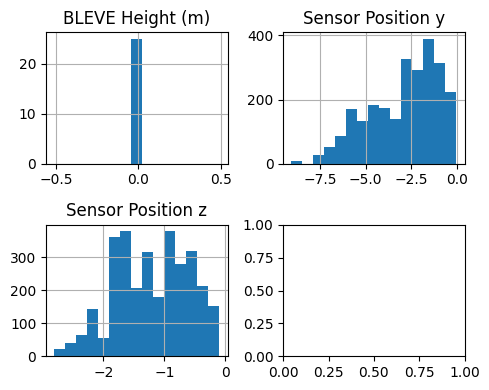

In [383]:
n_cols = 2
n_rows = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*2.5, n_rows*2))

i = 0
for var in raw_data5.columns:
    temp = raw_data5[raw_data5[var] < 0]
    
    if not temp.empty:
        ax = axs[i//n_cols, i%n_cols]
        temp[var].hist(bins=15, ax = ax)
        ax.set_title(f'{var}')
        i += 1

plt.tight_layout()

In [384]:
raw_data5["Liquid Boiling Temperature (K)"].unique()

array([0., 1.])

Note that the "BLEVE Height (m)" is "the distance of the tank to the ground (in meter)" [sic]. After confirming with the source of the data that this can not be negative, we must remove it from our data.

Additionally, the "Liquid Boiling Temperature" is in Kelvin, however, all values in our set are negative (which is impossible as Kelvin is an absolute scale). Whilst this appears to be invalid, we'll discuss in 2.6.6 how this is actually just a mistake in the recording of data

In [385]:
raw_data5["BLEVE Height (m)"] = raw_data5["BLEVE Height (m)"].clip(lower = 0)

### Others

The height of vapour in the tank should not exceed the height of the tank itself

In [386]:
raw_data5.loc[raw_data5["Tank Height (m)"] < raw_data5["Vapour Height (m)"]].head(10)[["Tank Height (m)","Vapour Height (m)"]]

,Tank Height (m),Vapour Height (m)
3413,0.59,0.6
3414,0.59,0.6
3415,0.59,0.6
3416,0.59,0.6
3417,0.59,0.6
3418,0.59,0.6
3419,0.59,0.6
3420,0.59,0.6
3421,0.59,0.6
3422,0.59,0.6


In [387]:
raw_data6 = raw_data5.query("`Tank Height (m)` >= `Vapour Height (m)`")

## Duplicates

In [388]:
# 4: Removing Duplicates
display(raw_data6[raw_data6.duplicated(keep=False)].sort_values(by=raw_data5.columns.tolist()))

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,tgt_pressure,Superheated_status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),event_num
186,3392.0,21.090,0.67,1.600,4.20,1.19,1.000,0.40,411.370,286.875,...,2.0,15.75,12.20,13.6,0.105344,0.0,1.0,1.0,1.0,8
187,3392.0,21.090,0.67,1.600,4.20,1.19,1.000,0.40,411.370,286.875,...,2.0,15.75,12.20,13.6,0.105344,0.0,1.0,1.0,1.0,8
461,3669.0,34.910,0.69,2.195,4.20,0.60,1.800,0.20,314.120,347.740,...,5.0,16.80,2.65,-1.7,0.131426,0.0,1.0,1.0,1.0,18
462,3669.0,34.910,0.69,2.195,4.20,0.60,1.800,0.20,314.120,347.740,...,5.0,16.80,2.65,-1.7,0.131426,0.0,1.0,1.0,1.0,18
760,3972.0,36.875,0.58,2.590,3.40,2.60,1.205,1.01,331.050,286.950,...,1.0,19.95,8.20,-1.5,0.083324,0.0,1.0,1.0,1.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,12477.0,31.275,0.28,3.000,2.61,2.80,0.800,2.00,568.335,315.290,...,1.0,16.35,3.80,-1.6,0.142715,0.0,0.0,0.0,0.0,345
9493,12758.0,16.390,0.55,0.810,5.61,2.00,1.600,0.80,293.410,284.460,...,2.0,15.35,4.60,3.8,0.294822,0.0,0.0,0.0,0.0,355
9494,12758.0,16.390,0.55,0.810,5.61,2.00,1.600,0.80,293.410,284.460,...,2.0,15.35,4.60,3.8,0.294822,0.0,0.0,0.0,0.0,355
9935,13201.0,18.285,0.57,2.000,7.19,1.00,0.205,0.40,540.390,319.200,...,5.0,16.10,6.85,7.1,0.126599,0.0,0.0,0.0,0.0,371


In [389]:
raw_data7 = raw_data6.drop_duplicates()
print(f"Data dropped: {len(raw_data6) - len(raw_data7)}")

Data dropped: 48


In [390]:
len(raw_data7)

9811

## Major Edits

We will split the data into train, validation and test sets before analysing the data (so we can test our hypotheses locally before submitting them for assessment). However, before we do this, we'll do perform any changes that apply to all datasets here (so we don't have to add them to each dataset separately). This mainly includes renaming the columns to something more friendly for analysis (i.e. snake_case), as well as adding features that we'll explore later.

### Variable Renaming

In [391]:
renamed_cols = [
    "ID",
    "failure_pressure",
    "liquid_pct",
    "tank_w",
    "tank_l",
    "tank_h",
    "BLEVE_h",
    "vapour_height",
    "vapour_temp",
    "liquid_temp",
    "obstacle_dist",
    "obstacle_w",
    "obstacle_h",
    "obstacle_thk",
    "obstacle_angle",
    "sensor_id",
    "sensor_side",
    "sensor_x",
    "sensor_y",
    "sensor_z",
    "tgt_pressure",
    "superheated_status",
    "lqd_crit_pressure",
    "lqd_boil_temp",
    "lqd_crit_temp",
    "event_num",
    "tank_volume",
    "net_sensor_dist"
]

In [392]:
dict_names = dict(zip(raw_data7.columns, renamed_cols))

raw_data8 = raw_data7.rename(columns = dict_names)
raw_test_data3 = raw_test_data2.rename(columns = dict_names)

### Feature Addition

In [395]:
temp = raw_data8[["liquid_pct","vapour_height","tank_h"]].copy()

In [396]:
temp["vapour_height_calc"] = temp["tank_h"] * (1 - temp["liquid_pct"])
temp["dif"] = temp["vapour_height_calc"] - temp["vapour_height"]

Immediately we can see that many of our variables relate to each other
* E.g. we have tank height, length and width, which suggest that we should create a variable for the tank volume.
* Also, we have the location of sensors. This is quite important, but we can group sensors by "front", "back" and "side" (rather than looking at them individually)
* Furthermore, we can try convert the sensor's position into a distance metric

In [397]:
tank_axis = ["tank_w", "tank_h", "tank_l"]
raw_data8["tank_volume"] = raw_data8[tank_axis].prod(axis = 1)
raw_data8.drop(columns = tank_axis, inplace = True)

raw_data8["sensor_location"] = raw_data8["sensor_side"].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 3}) # changes 4 and 5 (both sides) to 3 (1 = back, 2 = front, 3 = sides)

sensor_vars = ["sensor_x", "sensor_y", "net_z"]
raw_data8["net_z"] = raw_data8["sensor_z"] - raw_data8["BLEVE_h"]
raw_data8["net_sensor_dist"] = np.linalg.norm(raw_data8[sensor_vars], axis=1)
sensor_vars.append("sensor_z")
raw_data8.drop(columns = sensor_vars, inplace = True)

lqd_properties = ["lqd_crit_pressure", "lqd_boil_temp", "lqd_crit_temp"]
raw_data8["substance"] = raw_data8[lqd_properties].prod(axis = 1)
raw_data8.drop(columns = lqd_properties, inplace = True)

# raw_data8["vapour_volume"] = 

In [398]:
raw_test_data3["tank_volume"] = raw_test_data3[tank_axis].prod(axis = 1)
raw_test_data3["sensor_location"] = raw_test_data3["sensor_side"].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 3})
raw_test_data3["net_z"] = raw_test_data3["sensor_z"] - raw_test_data3["BLEVE_h"]
raw_test_data3["net_sensor_dist"] = np.linalg.norm(raw_test_data3[sensor_vars], axis=1)
raw_test_data3["substance"] = raw_test_data3[lqd_properties].prod(axis = 1)

## Real-World Research

In [399]:
expl_data = raw_data5.copy()

Here we have the properties of the 2 unique substances present in our data

In [170]:
substance_properties

,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K)
0,37.9,-1.0,152.0
1,42.5,-42.0,96.7


As mentioned in 2.3.2 (and by using common sense), a sub-0 boiling temperature raises some red flags and that they instead might be in degrees celsius. 

Through some elementary research, we can discover that these are the distinct properties of 2 unique molecules; n-butane and propane respectively.

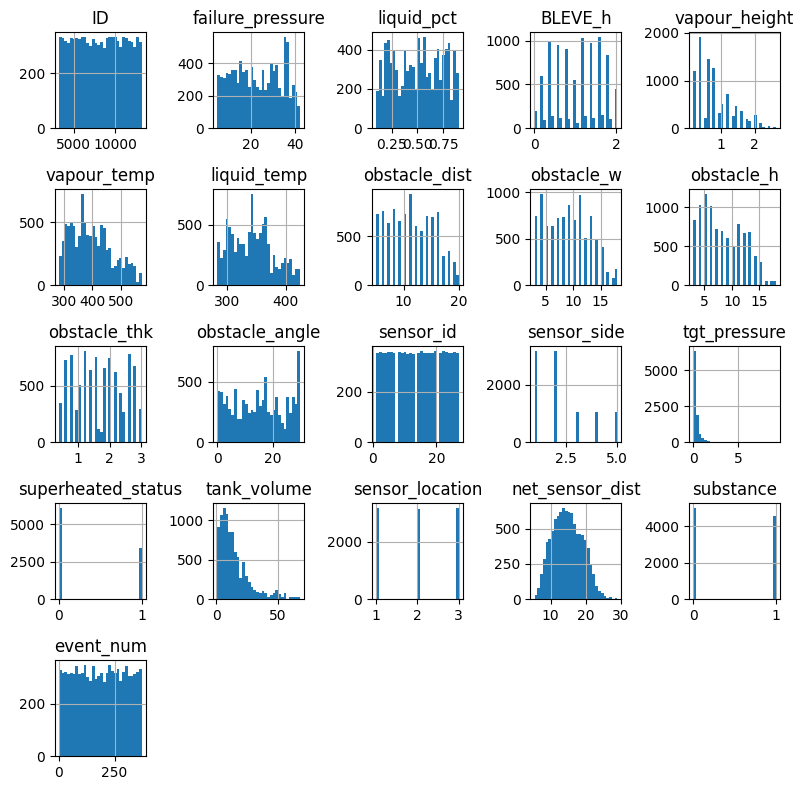

In [171]:
expl_data.hist(bins = 30, figsize = (8,8))
plt.tight_layout()
plt.show()

In [167]:
expl_data

,ID,failure_pressure,liquid_pct,BLEVE_h,vapour_height,vapour_temp,liquid_temp,obstacle_dist,obstacle_w,obstacle_h,...,tgt_pressure,superheated_status,tank_volume,sensor_location,net_sensor_dist,substance,event_num,BP_orig,BP_new,temp_excess
0,3203.0,7.32,0.42,1.79,0.60,524.61,354.49,11.0,11.0,13.0,...,0.199929,1,13.043800,2,17.012366,0,1,-1.0,340.650,13.840
1,3204.0,7.18,0.42,1.81,0.59,522.80,354.31,11.0,11.0,13.0,...,0.435681,1,13.010921,3,13.368493,0,1,-1.0,339.820,14.490
2,3205.0,7.32,0.41,1.78,0.62,523.00,354.59,11.0,11.0,13.0,...,0.264031,1,12.858200,3,13.107895,0,1,-1.0,340.650,13.940
3,3206.0,7.26,0.42,1.81,0.61,522.35,354.37,11.0,11.0,13.0,...,0.270576,1,12.984000,3,15.620006,0,1,-1.0,340.296,14.074
4,3207.0,7.32,0.42,1.79,0.62,522.98,354.33,11.0,11.0,13.0,...,0.204675,1,13.243680,3,15.759572,0,1,-1.0,340.650,13.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13198.0,18.09,0.57,0.18,0.39,540.00,319.57,14.0,12.0,15.0,...,0.100168,0,14.092400,3,21.695170,0,371,-1.0,384.654,-65.084
9996,13199.0,18.18,0.57,0.22,0.41,539.59,318.92,14.0,12.0,15.0,...,0.116293,0,13.951476,3,22.637146,0,371,-1.0,384.927,-66.007
9997,13200.0,18.21,0.57,0.19,0.39,540.22,319.25,14.0,12.0,15.0,...,0.112795,0,14.236200,3,17.500989,0,371,-1.0,385.018,-65.768
9998,13201.0,18.41,0.57,0.21,0.41,539.23,318.86,14.0,12.0,15.0,...,0.126599,0,14.451181,3,18.804377,0,371,-1.0,385.620,-66.760


In [164]:
def enthalpy_of_vap(substance_dict, df):
    lookup = substance_dict
    t0 = df[]
    tb = lookup["tb"]
    tc = lookup["tc"]
    pc = lookup["pc"]

    num = 1.092 * 8.3145 * tb * (np.log(pc) - 1.013)
    denom = 0.93 - tb / tc
    frac = (tc - t0) / (tc - tb)

    return num / denom * frac ** 0.383

In [166]:
n_butane_props = {
    "tb": -1 + 273.15,
    "tc": 425.1,
    "pc": 3796.0,
}

propane_props = {
    "tb": -42 + 273.15 ,
    "tc": 369.522,
    "pc": 4249.24,
}

In [136]:
# Calculating the boiling point at the failure pressure through the Classius-Clayperton equation

def calc_new_BP(p2, element):
    if element == "n-butane" or element == 0:
        h = 22.40 * 1000
        p1 = 1
        t1 = -1 + 273.15
    elif element == "propane" or element == 1:
        h = 16.25 * 1000
        p1 = 1
        t1 = -42 + 273.15
    else:
        raise ValueError("Element must be propane or n-butane")

    calc = 1/t1 - 8.3145 * np.log(p2/p1)/h
    return round(1/calc, 3)

In [159]:
map_dict = {0: -1.0, 1: -42.0}
expl_data["BP_orig"] = expl_data["substance"].map(map_dict)
expl_data["BP_new"] = expl_data.apply(lambda row: calc_new_BP(row["failure_pressure"], row["substance"]), axis = 1)
expl_data["temp_excess"] =  expl_data["liquid_temp"] - expl_data["BP_new"]

In [160]:
expl_data

,ID,failure_pressure,liquid_pct,BLEVE_h,vapour_height,vapour_temp,liquid_temp,obstacle_dist,obstacle_w,obstacle_h,...,tgt_pressure,superheated_status,tank_volume,sensor_location,net_sensor_dist,substance,event_num,BP_orig,BP_new,temp_excess
0,3203.0,7.32,0.42,1.79,0.60,524.61,354.49,11.0,11.0,13.0,...,0.199929,1,13.043800,2,17.012366,0,1,-1.0,340.650,13.840
1,3204.0,7.18,0.42,1.81,0.59,522.80,354.31,11.0,11.0,13.0,...,0.435681,1,13.010921,3,13.368493,0,1,-1.0,339.820,14.490
2,3205.0,7.32,0.41,1.78,0.62,523.00,354.59,11.0,11.0,13.0,...,0.264031,1,12.858200,3,13.107895,0,1,-1.0,340.650,13.940
3,3206.0,7.26,0.42,1.81,0.61,522.35,354.37,11.0,11.0,13.0,...,0.270576,1,12.984000,3,15.620006,0,1,-1.0,340.296,14.074
4,3207.0,7.32,0.42,1.79,0.62,522.98,354.33,11.0,11.0,13.0,...,0.204675,1,13.243680,3,15.759572,0,1,-1.0,340.650,13.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,13198.0,18.09,0.57,0.18,0.39,540.00,319.57,14.0,12.0,15.0,...,0.100168,0,14.092400,3,21.695170,0,371,-1.0,384.654,-65.084
9996,13199.0,18.18,0.57,0.22,0.41,539.59,318.92,14.0,12.0,15.0,...,0.116293,0,13.951476,3,22.637146,0,371,-1.0,384.927,-66.007
9997,13200.0,18.21,0.57,0.19,0.39,540.22,319.25,14.0,12.0,15.0,...,0.112795,0,14.236200,3,17.500989,0,371,-1.0,385.018,-65.768
9998,13201.0,18.41,0.57,0.21,0.41,539.23,318.86,14.0,12.0,15.0,...,0.126599,0,14.451181,3,18.804377,0,371,-1.0,385.620,-66.760


In [161]:
sensor1 = list(expl_data.groupby("sensor_id"))[14][1]

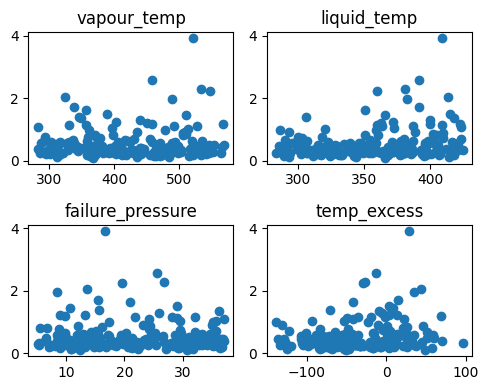

In [162]:
plot_tgt_var(sensor1.query("substance == 0"),["vapour_temp", "liquid_temp","failure_pressure", "temp_excess"], n_cols = 2)

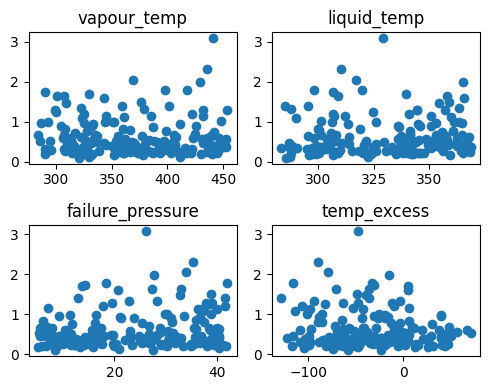

In [163]:
plot_tgt_var(sensor1.query("substance == 1"),["vapour_temp", "liquid_temp","failure_pressure", "temp_excess"], n_cols = 2)

## Splitting Data

In [140]:
# Train, Validation and Test Splits
val_train_ratio = 0.7
val_val_ratio = 0.15

n_events = max(raw_data5["event_num"])
val_train_qty = int(val_train_ratio * n_events)
val_val_qty = int(val_val_ratio * n_events) + val_train_qty

train_split = raw_data5[raw_data5["event_num"]<val_train_qty]
validation_split = raw_data5[(raw_data5["event_num"]>=val_train_qty) & (raw_data5["event_num"]<val_val_qty)]
test_split = raw_data5[raw_data5["event_num"]>=val_val_qty]

## Feature Selection

In [146]:
ft_data = train_split.copy()

Immediately based off priors, we can see that many of our variables relate to each other. E.g. we have tank height, length and width, which suggest that we should create a variable for the tank volume.

### Exploration

In [147]:
# Plotting Variables vs tgt_pressure
def plot_tgt_var(df, vars = None, n_cols = 4):
    if vars == None:
        vars = df.columns
        
    numeric_cols = df[vars].select_dtypes(include = np.number).columns.to_list()
    n_cols = n_cols
    n_rows = int(len(numeric_cols) / n_cols) + (len(numeric_cols) % n_cols > 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))
    
    i = 0
    for col_name in numeric_cols:
        if col_name != "tgt_pressure":
            ax = axs[i//n_cols, i%n_cols]
            ax.scatter(df[col_name], df["tgt_pressure"])
            ax.set_title(f"{col_name}")
            i += 1
    
    plt.tight_layout()
    plt.show()

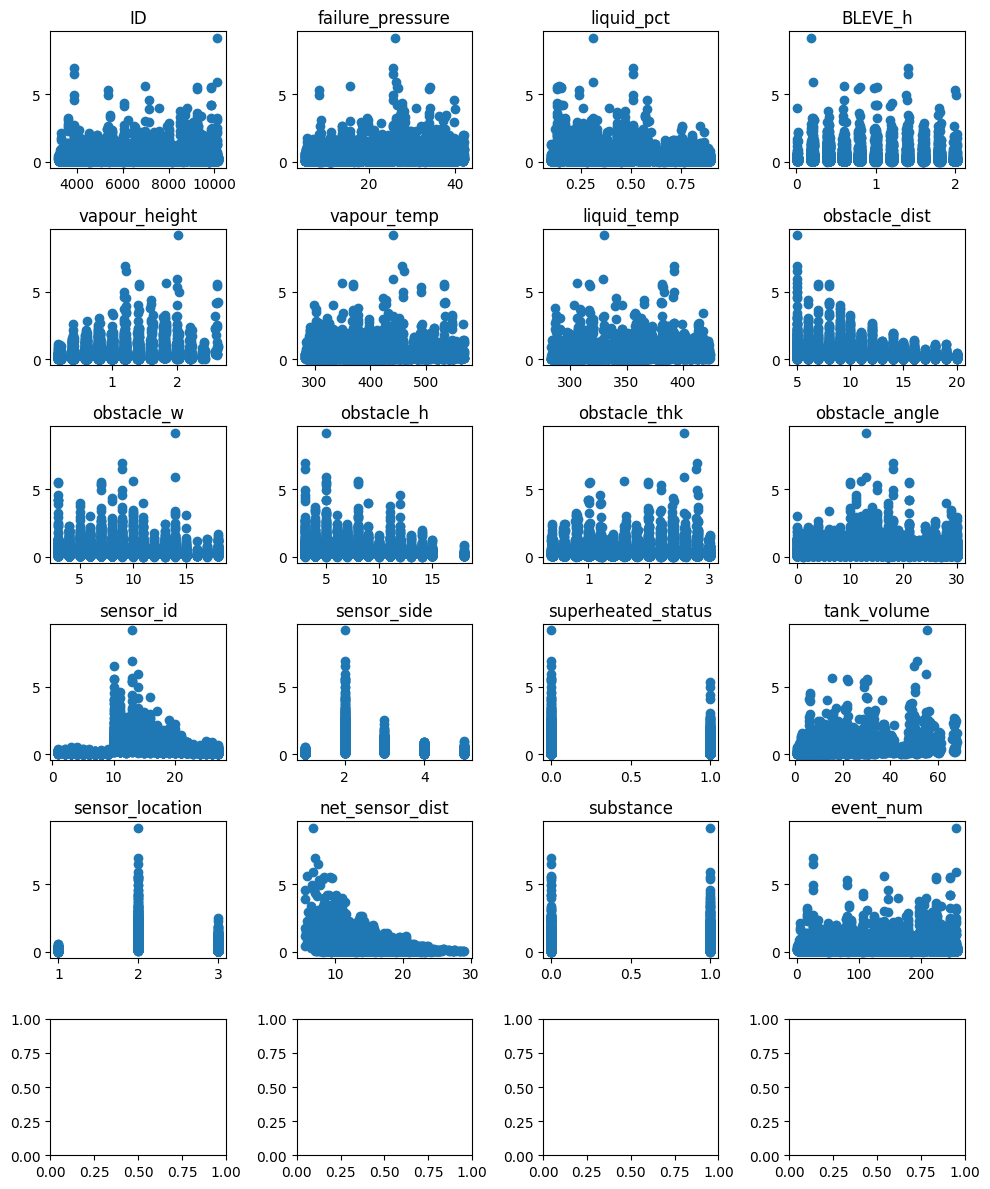

In [148]:
plot_tgt_var(ft_data)

In [149]:
ft_data.corr().style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

,ID,failure_pressure,liquid_pct,BLEVE_h,vapour_height,vapour_temp,liquid_temp,obstacle_dist,obstacle_w,obstacle_h,obstacle_thk,obstacle_angle,sensor_id,sensor_side,tgt_pressure,superheated_status,tank_volume,sensor_location,net_sensor_dist,substance,event_num
ID,1.000000,-0.010704,-0.057514,0.024441,0.050448,-0.109155,0.031929,-0.101321,0.001596,-0.029880,0.052360,-0.010802,0.000438,0.001836,0.072758,0.060663,0.016231,0.001674,-0.103989,0.061794,0.999993
failure_pressure,-0.010704,1.000000,0.106155,0.044939,-0.157061,-0.119665,-0.096419,0.054897,-0.063539,-0.023416,-0.059287,0.105185,-0.005272,-0.004889,0.065467,-0.606802,-0.113167,-0.005092,0.047829,0.129814,-0.010683
liquid_pct,-0.057514,0.106155,1.000000,0.019677,-0.645609,-0.038210,0.087286,0.038327,-0.060438,0.072178,-0.056348,0.050773,-0.003893,-0.003850,-0.134594,0.034073,0.155577,-0.003660,0.057270,0.057416,-0.057498
BLEVE_h,0.024441,0.044939,0.019677,1.000000,-0.109168,-0.016487,0.002737,0.042797,0.016973,0.012328,0.002784,0.086427,-0.000603,-0.001825,-0.068475,-0.062197,-0.110366,-0.001804,0.019250,-0.076202,0.024443
vapour_height,0.050448,-0.157061,-0.645609,-0.109168,1.000000,0.105350,-0.007091,-0.050561,-0.089607,-0.203722,-0.020965,0.017463,0.002269,0.002023,0.277829,0.069881,0.213699,0.001885,-0.102078,-0.044116,0.050439
vapour_temp,-0.109155,-0.119665,-0.038210,-0.016487,0.105350,1.000000,0.148646,-0.075596,-0.000449,-0.015561,-0.025239,-0.062253,0.002766,0.002350,0.031989,-0.006689,-0.044739,0.003507,-0.075914,-0.364508,-0.109165
liquid_temp,0.031929,-0.096419,0.087286,0.002737,-0.007091,0.148646,1.000000,0.008385,-0.006002,-0.100946,-0.081085,-0.079684,-0.000968,-0.001228,0.055080,0.398243,0.036204,-0.000643,-0.023131,-0.402776,0.031933
obstacle_dist,-0.101321,0.054897,0.038327,0.042797,-0.050561,-0.075596,0.008385,1.000000,-0.026203,-0.163540,-0.046593,0.000850,-0.004524,-0.003745,-0.212391,-0.045132,0.017397,-0.003827,0.893810,0.021409,-0.101303
obstacle_w,0.001596,-0.063539,-0.060438,0.016973,-0.089607,-0.000449,-0.006002,-0.026203,1.000000,-0.250705,0.067118,0.016081,-0.000272,-0.000457,-0.083727,-0.045442,-0.116046,-0.001303,0.052433,-0.037054,0.001597
obstacle_h,-0.029880,-0.023416,0.072178,0.012328,-0.203722,-0.015561,-0.100946,-0.163540,-0.250705,1.000000,-0.049570,0.018748,0.005281,0.005632,-0.124977,-0.081957,-0.133878,0.006721,-0.025409,-0.018760,-0.029900


In [150]:
ft_data.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

,ID,failure_pressure,liquid_pct,BLEVE_h,vapour_height,vapour_temp,liquid_temp,obstacle_dist,obstacle_w,obstacle_h,obstacle_thk,obstacle_angle,sensor_id,sensor_side,tgt_pressure,superheated_status,tank_volume,sensor_location,net_sensor_dist,substance,event_num
tgt_pressure,0.072758,0.065467,-0.134594,-0.068475,0.277829,0.031989,0.055080,-0.212391,-0.083727,-0.124977,0.010697,-0.028009,0.062716,-0.006445,1.000000,-0.004482,0.301435,0.129964,-0.366034,0.031344,0.072516


In [151]:
sample = ft_data.loc[10:36]

In [152]:
sample

,ID,failure_pressure,liquid_pct,BLEVE_h,vapour_height,vapour_temp,liquid_temp,obstacle_dist,obstacle_w,obstacle_h,...,obstacle_angle,sensor_id,sensor_side,tgt_pressure,superheated_status,tank_volume,sensor_location,net_sensor_dist,substance,event_num
10,3213.0,30.67,0.81,1.19,0.18,362.88,407.79,9.0,4.0,14.0,...,16.0,1.0,1.0,0.112700,0,5.574240,1,11.117851,0,2
11,3214.0,30.55,0.81,1.21,0.20,364.21,407.75,9.0,4.0,14.0,...,16.0,2.0,1.0,0.092203,0,5.570922,1,11.769562,0,2
12,3215.0,30.43,0.81,1.20,0.20,363.71,407.75,9.0,4.0,14.0,...,16.0,3.0,1.0,0.081909,0,5.786802,1,15.686061,0,2
13,3216.0,30.68,0.81,1.19,0.20,363.14,407.51,9.0,4.0,14.0,...,16.0,4.0,1.0,0.074419,0,5.654320,1,11.389759,0,2
14,3217.0,30.63,0.80,1.18,0.19,363.49,407.71,9.0,4.0,14.0,...,16.0,5.0,1.0,0.067301,0,5.503680,1,12.037977,0,2
15,3218.0,30.84,0.81,1.20,0.18,364.34,407.15,9.0,4.0,14.0,...,16.0,6.0,1.0,0.067518,0,5.479598,1,15.879940,0,2
16,3219.0,30.54,0.80,1.19,0.19,363.34,407.23,9.0,4.0,14.0,...,16.0,7.0,1.0,0.049418,0,5.831676,1,11.930071,0,2
17,3220.0,30.56,0.81,1.19,0.20,363.09,407.05,9.0,4.0,14.0,...,16.0,8.0,1.0,0.051730,0,5.619200,1,12.546816,0,2
18,3221.0,30.67,0.81,1.21,0.20,363.72,407.69,9.0,4.0,14.0,...,16.0,9.0,1.0,0.048919,0,5.738040,1,16.264889,0,2
19,3222.0,30.56,0.81,1.21,0.22,364.21,407.02,9.0,4.0,14.0,...,16.0,10.0,2.0,0.538407,0,5.479598,2,10.051796,0,2


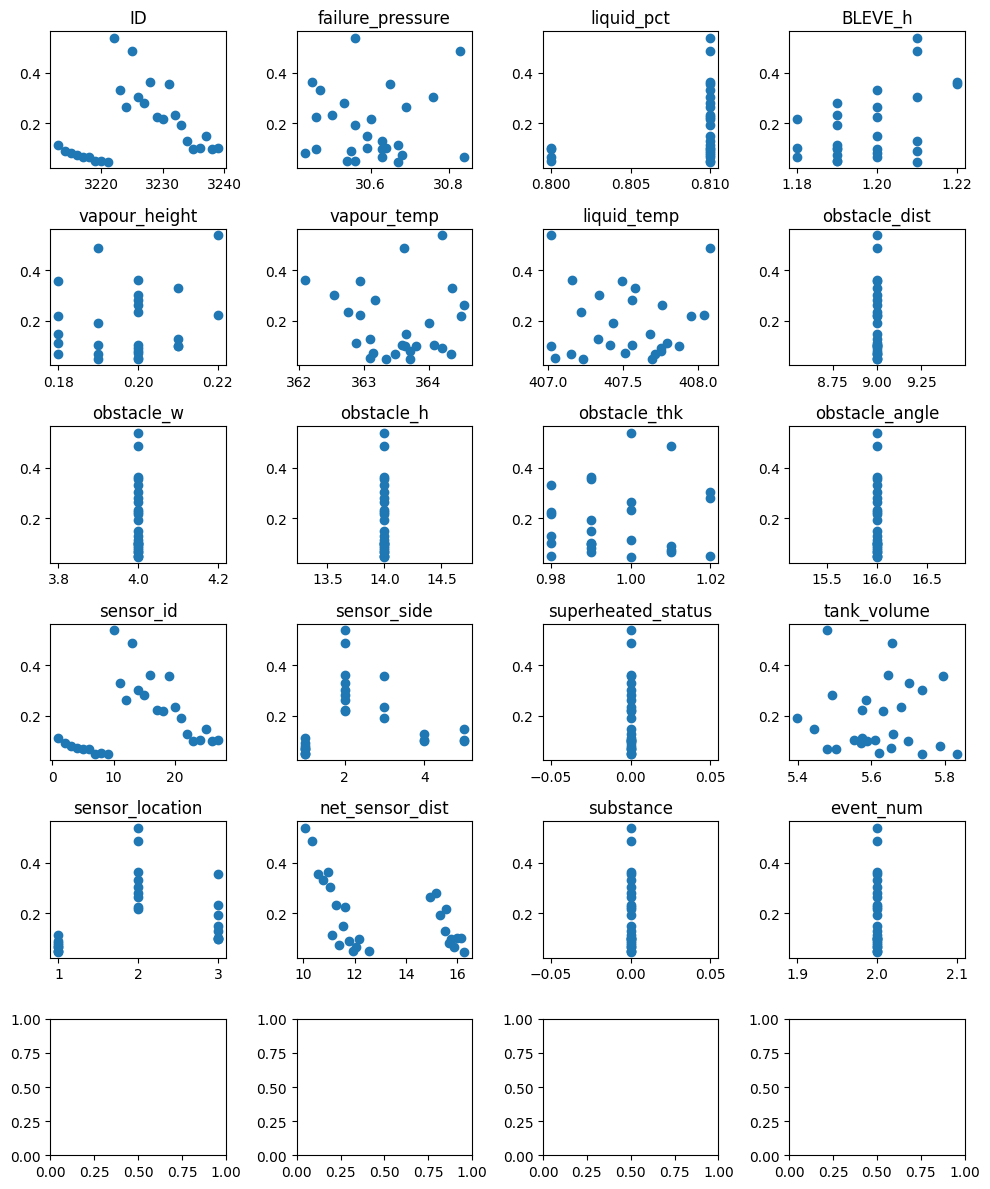

In [153]:
plot_tgt_var(sample)

Looking into distinguishing by sensor_side (instead of individual sensors)

In [154]:
raw_data2[["Sensor Position Side", "Sensor ID"]].drop_duplicates().sort_values(by = "Sensor ID")

,Sensor Position Side,Sensor ID
10,1.0,1.0
11,1.0,2.0
12,1.0,3.0
13,1.0,4.0
14,1.0,5.0
15,1.0,6.0
16,1.0,7.0
17,1.0,8.0
18,1.0,9.0
19,2.0,10.0


In [155]:
# We can group IDs by Position Side as such:
# 1: 1-9
# 2: 10-18
# 3: 19-21
# 4: 22-24
# 5: 25-27

# This was done above in 2.5.1 "sensor_location" (using 1 = back, 2 = front, 3 = sides)

In [156]:
grpd_sensor_loc = ft_data.groupby("sensor_location")
grpd_sensor_loc_vld = validation_split.groupby("sensor_location")

### Net Sensor Distance

In [54]:
# Plotting Variables vs tgt_pressure for Each Sensor
def plot_sensor_data(grpd_data, vars = None, n_cols = 4):
    if vars == None:
        vars = df.columns
        
    n_cols = min(len(vars), n_cols)
    n_rows = 27
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))
    
    i = 0
    for sensor_id, df in grpd_data:
        for col_name in vars:
            ax = axs[i//n_cols, i%n_cols]
            ax.scatter(df[col_name], df["tgt_pressure"])
            ax.set_title(f"{i//n_cols+1}: {col_name}")
            i += 1
        
    plt.tight_layout()
    plt.show()

In [55]:
grpd = ft_data.groupby("sensor_id")

# plot_sensor_data(grpd, ["sensor_x", "sensor_y", "sensor_z", "net_sensor_dist"])

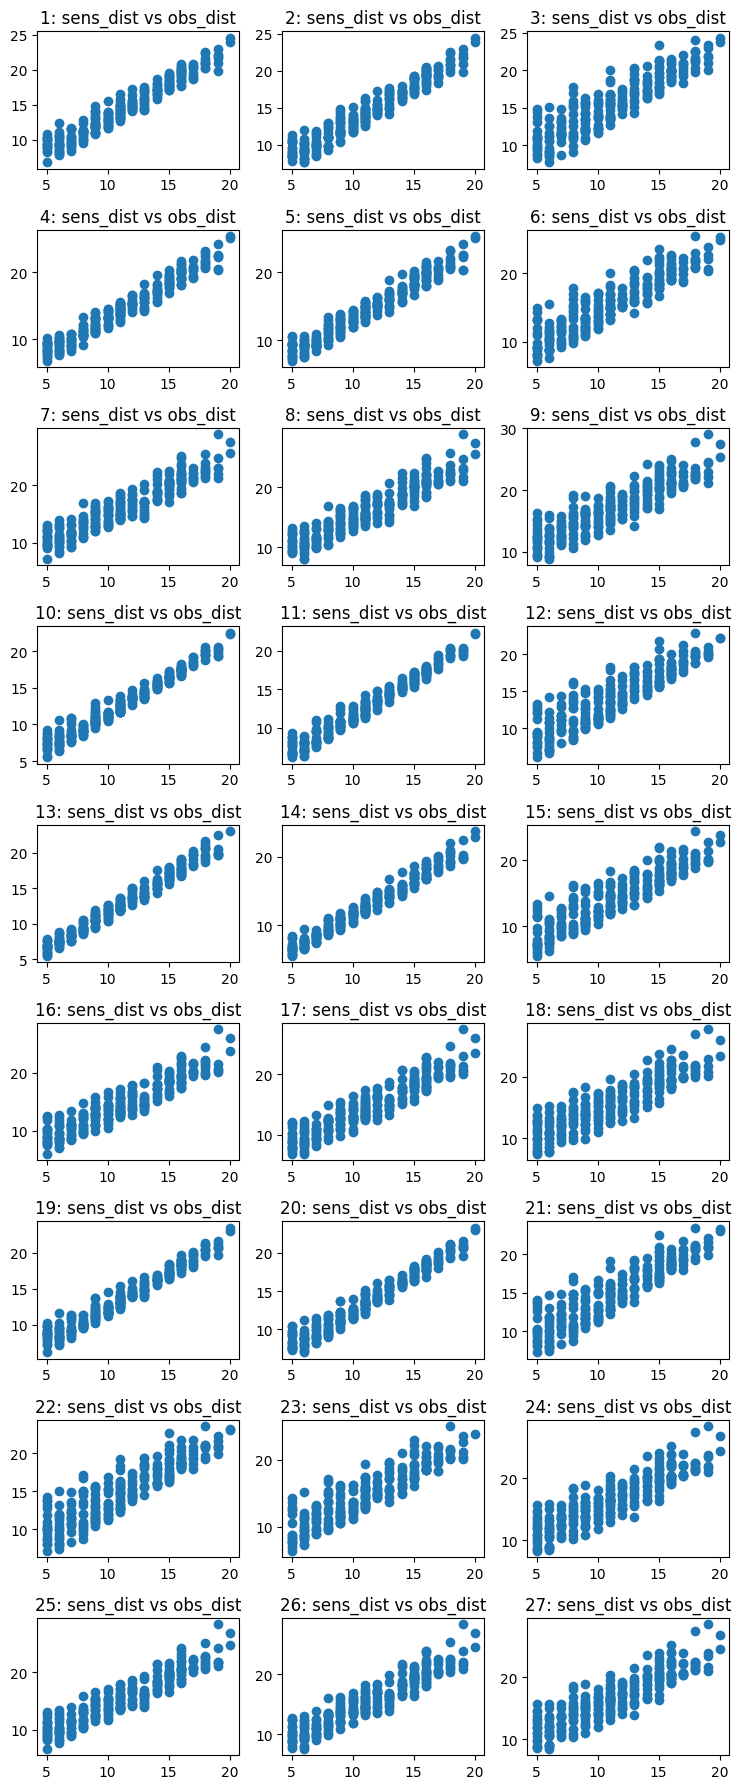

In [56]:
n_cols = 3
n_rows = 9
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))

i = 0
for sensor_id, df in grpd:
    ax = axs[i//n_cols, i%n_cols]
    ax.scatter(df["obstacle_dist"], df["net_sensor_dist"])
    ax.set_title(f"{i+1}: sens_dist vs obs_dist")
    i += 1
    
plt.tight_layout()
plt.show()

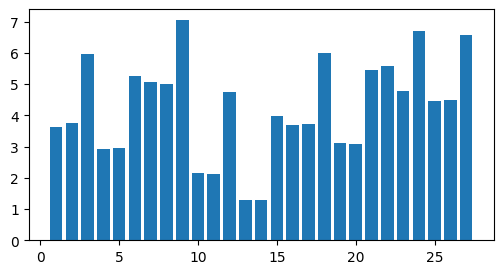

In [57]:
y_intercepts = []

for sensor_id, df in grpd:
    X = df[["obstacle_dist"]]
    y = df["net_sensor_dist"]
    model = LinearRegression()
    model.fit(X, y)

    # Get y-intercept
    y_intercept = model.intercept_
    y_intercepts.append(y_intercept)

# Plot y-intercepts on a bar graph
plt.figure(figsize=(6, 3))
plt.bar(range(1, len(y_intercepts) + 1), y_intercepts)
plt.show()

In [58]:
ft_data.corr()[["tgt_pressure","net_sensor_dist","obstacle_dist"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

,ID,failure_pressure,liquid_pct,BLEVE_h,vapour_height,vapour_temp,liquid_temp,obstacle_dist,obstacle_w,obstacle_h,obstacle_thk,obstacle_angle,sensor_id,sensor_side,tgt_pressure,superheated_status,tank_volume,sensor_location,net_sensor_dist,substance,event_num
tgt_pressure,0.072758,0.065467,-0.134594,-0.068475,0.277829,0.031989,0.055080,-0.212391,-0.083727,-0.124977,0.010697,-0.028009,0.062716,-0.006445,1.000000,-0.004482,0.301435,0.129964,-0.366034,0.031344,0.072516
net_sensor_dist,-0.103989,0.047829,0.057270,0.019250,-0.102078,-0.075914,-0.023131,0.893810,0.052433,-0.025409,0.034423,0.099988,0.039214,0.038827,-0.366034,-0.074113,0.014592,-0.027249,1.000000,0.019095,-0.104140
obstacle_dist,-0.101321,0.054897,0.038327,0.042797,-0.050561,-0.075596,0.008385,1.000000,-0.026203,-0.163540,-0.046593,0.000850,-0.004524,-0.003745,-0.212391,-0.045132,0.017397,-0.003827,0.893810,0.021409,-0.101303


In [59]:
def reg_stats(df, vars):
    r_sq_result = {}
    
    for predictor in vars:
        X = df[[predictor]]
        y = df["tgt_pressure"]
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = r2_score(y, y_pred)
        coefficients = model.coef_  # Get the coefficients
        r_sq_result[predictor] = {"R-squared": r_squared, "Coefficients": coefficients}
    
    
    for key, val in r_sq_result.items():
        print(f"### {key} ###\nCoeff = {val['Coefficients'][0]:.4f}\nR^2 = {val['R-squared']:.6f}\n")

In [60]:
X = ft_data[["net_sensor_dist"]]
y = ft_data["tgt_pressure"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
coefficients = model.coef_  # Get the coefficients
display(pd.DataFrame({"R-squared": r_squared, "Coefficients": coefficients}))

,R-squared,Coefficients
0,0.133981,-0.044535


In [61]:
reg_stats(ft_data, ["net_sensor_dist", "obstacle_dist"])

### net_sensor_dist ###
Coeff = -0.0445
R^2 = 0.133981

### obstacle_dist ###
Coeff = -0.0272
R^2 = 0.045110



Conclusion: it appears that the net_sensor_dist and obstacle_distance_to_BLEVE are very similar in nature, and without more information regarding the nature of the experiment, it is hard to pinpoint where exactly this difference comes from.net_sensor_dist has a stronger correlation with tgt_pressure than the obstacle_distance, we will use that instead.

### Automatic Variable Selection

In [62]:
def mape_calc(y_tgt, y_pred):
        return np.mean(np.abs(1 - y_pred / y_tgt))

In [125]:
def out_of_sample_test(model, data):
    y2 = data["tgt_pressure"]
    X2 = data.drop(columns=["tgt_pressure"])
    y2_pred = model.predict(X2)
    
    r2_2 = r2_score(y2, y2_pred)
    mape2 = mape_calc(y2, y2_pred)
    
    print(f"R^2: {r2_2:.4f}, MAPE: {mape2:.4f}")

In [64]:
def forward_selected_r2(data, response, max_features=5, select_features = 5, criterion='aic', k = False):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    if k == False:
        k = '-1 +'
    else:
        k = ''
    while remaining and len(selected) < max_features:
        scores_with_candidates = []
        if not selected:
            curr_score = float("inf")
            curr_r2 = 0
        else:
            curr_formula = f"{response} ~ {k}{' + '.join(selected)}"
            curr_model = sm.OLS.from_formula(curr_formula, data).fit()
            curr_r2 = curr_model.rsquared
            if criterion == "aic":
                curr_score = curr_model.aic
            elif criterion == "bic":
                curr_score = curr_model.bic
        for candidate in remaining:
            formula = f"{response} ~ {k}{' + '.join(selected + [candidate])}"
            if criterion == 'aic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.aic
                r_squared = model.rsquared
            elif criterion == 'bic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.bic
                r_squared = model.rsquared
            else:
                raise ValueError("Invalid: use 'aic' or 'bic'")
            scores_with_candidates.append((score, r_squared, candidate))
        scores_with_candidates.sort()
        
        print(f"\nBest variables (current: {criterion.upper()} = {curr_score:.2f}, R^2 = {curr_r2:.4f}):")
        for i, (score, r_squared, candidate) in enumerate(scores_with_candidates[:select_features], 1): # enumerate from 1 instead of 0
            print(f"{i}. {candidate.ljust(20)} \tAIC={score:.2f}, \tR^2={r_squared:.4f}")
        
        user_input = input(f"Variable to add (1-{select_features}): ")
        try:
            choice = int(user_input)
            if 1 <= choice <= select_features:
                best_candidate = scores_with_candidates[choice - 1][2]
                print(f"\n### Adding {best_candidate} ###")
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = scores_with_candidates[choice - 1][0]
            else:
                break
        except ValueError:
            print("Invalid. Enter a number")

    if not selected:
        raise ValueError("No variables added to model")
            
    formula = f"{response} ~ {k}{' + '.join(selected)}"
    model = sm.OLS.from_formula(formula, data).fit()

    y_tgt = data[response]
    y_pred = model.predict(data).clip(0)
    mape = mape_calc(y_tgt, y_pred)
    
    print(f"\n\n### METRICS ###\nMape:\t{mape:.4f} \nR^2:\t{model.rsquared:.4f}")
    print("\n",model.summary(),"\n")

    
    plt.figure(figsize=(6, 3))
    plt.scatter(y_pred, y_tgt)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--', label='y = x')
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Accuracy of Predictions")
    plt.grid(True)
    plt.show()
    
    return model

In [65]:
def forward_selected_mape(data, response, max_features=5, select_features=5, criterion='aic', k=False):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    if k == False:
        k = '-1 +'
    else:
        k = ''
    while remaining and len(selected) < max_features:
        scores_with_candidates = []
        if not selected:
            curr_score = float("inf")
            curr_mape = float("inf")
            curr_r2 = 0
        else:
            curr_formula = f"{response} ~ {k}{' + '.join(selected)}"
            curr_model = sm.OLS.from_formula(curr_formula, data).fit()
            curr_mape = mape_calc(data[response], curr_model.predict(data))
            curr_r2 = curr_model.rsquared
            if criterion == "aic":
                curr_score = curr_model.aic
            elif criterion == "bic":
                curr_score = curr_model.bic
        for candidate in remaining:
            formula = f"{response} ~ {k}{' + '.join(selected + [candidate])}"
            if criterion == 'aic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.aic
            elif criterion == 'bic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.bic
            else:
                raise ValueError("Invalid: use 'aic' or 'bic'")
            mape = mape_calc(data[response], model.predict(data))
            r2 = model.rsquared
            scores_with_candidates.append((score, mape, r2, candidate))
        scores_with_candidates.sort(key=lambda x: x[1])
        
        print(f"\nBest variables (current: {criterion.upper()} = {curr_score:.2f}, MAPE = {curr_mape:.4f}, R^2 = {curr_r2:.4f}):")
        for i, (score, mape, r2, candidate) in enumerate(scores_with_candidates[:select_features], 1):
            print(f"{i}. {candidate.ljust(20)} \tAIC={score:.2f}, \tMAPE={mape:.4f}, \tR^2={r2:.4f}")

        user_input = input(f"Variable to add (1-{select_features}): ")
        try:
            choice = int(user_input)
            if 1 <= choice <= select_features:
                best_candidate = scores_with_candidates[choice - 1][3]
                print(f"\n### Adding {best_candidate} ###")
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = scores_with_candidates[choice - 1][0]
            else:
                break
        except ValueError:
            print("Invalid. Enter a number")

    if not selected:
        raise ValueError("No variables added to model")

    formula = f"{response} ~ {k}{' + '.join(selected)}"
    model = sm.OLS.from_formula(formula, data).fit()

    y_tgt = data[response]
    y_pred = model.predict(data).clip(0)
    mape = mape_calc(y_tgt, y_pred)

    print(f"\n\n### METRICS ###\nMAPE:\t{mape:.4f} \n{criterion.upper()}:\t{current_score:.2f}")
    print("\n",model.summary(),"\n")

    plt.figure(figsize=(6, 3))
    plt.scatter(y_pred, y_tgt)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--', label='y = x')

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Accuracy of Predictions")
    plt.grid(True)
    plt.show()

    return model



Best variables (current: AIC = inf, R^2 = 0.0000):
1. vapour_height        	AIC=9606.49, 	R^2=0.3766
2. tank_volume          	AIC=9746.95, 	R^2=0.3633
3. liquid_temp          	AIC=9959.00, 	R^2=0.3427
4. sensor_location      	AIC=10016.01, 	R^2=0.3370
5. vapour_temp          	AIC=10029.38, 	R^2=0.3357


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = 9606.49, R^2 = 0.3766):
1. tank_volume          	AIC=8996.12, 	R^2=0.4315
2. sensor_location      	AIC=9323.54, 	R^2=0.4028
3. failure_pressure     	AIC=9356.13, 	R^2=0.3999
4. liquid_pct           	AIC=9420.27, 	R^2=0.3940
5. ID                   	AIC=9423.96, 	R^2=0.3937


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 8996.12, R^2 = 0.4315):
1. net_sensor_dist      	AIC=8846.09, 	R^2=0.4443
2. failure_pressure     	AIC=8903.60, 	R^2=0.4395
3. sensor_location      	AIC=8903.97, 	R^2=0.4395
4. obstacle_dist        	AIC=8933.57, 	R^2=0.4370
5. sensor_id            	AIC=8960.23, 	R^2=0.4347


Variable to add (1-5):  0




### METRICS ###
Mape:	1.4888 
R^2:	0.4315

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.431
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              2522.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:47:36   Log-Likelihood:                         -4496.1
No. Observations:                6648   AIC:                                      8996.
Df Residuals:                    6646   BIC:                                      9010.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025     

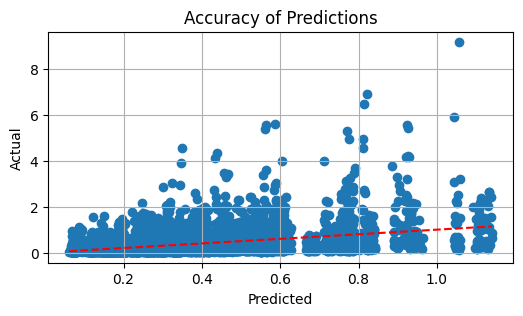

In [67]:
selected_model = forward_selected_r2(ft_data, "tgt_pressure", criterion='aic', k = False)

In [68]:
out_of_sample_test(selected_model, validation_split)

R^2: 0.0855, MAPE: 1.3275


In [ ]:
preds = selected_model.predict(raw_test_data3).clip(0)

In [ ]:
output_df = pd.DataFrame({'ID': preds.index, 'Target Pressure (bar)': preds.values})
output_df.to_csv('predictions.csv', index=False)

### Testing by Sensor Side

In [69]:
grpd_sensor_side = ft_data.groupby("sensor_side")
grpd_sensor_side_vld = validation_split.groupby("sensor_side")
grpd_sensor_side_test = raw_test_data3.groupby("sensor_side")


##### SIDE: back #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-5080.49, 	MAPE=0.5625, 	R^2=0.6565
2. vapour_height        	AIC=-5322.28, 	MAPE=0.6003, 	R^2=0.6921
3. failure_pressure     	AIC=-4836.65, 	MAPE=0.6900, 	R^2=0.6163
4. liquid_temp          	AIC=-5341.87, 	MAPE=0.6957, 	R^2=0.6948
5. ID                   	AIC=-5113.83, 	MAPE=0.6982, 	R^2=0.6616


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -5080.49, MAPE = 0.5625, R^2 = 0.6565):
1. vapour_height        	AIC=-6136.33, 	MAPE=0.4972, 	R^2=0.7873
2. failure_pressure     	AIC=-5948.27, 	MAPE=0.5359, 	R^2=0.7684
3. substance            	AIC=-5310.91, 	MAPE=0.5464, 	R^2=0.6908
4. superheated_status   	AIC=-5224.12, 	MAPE=0.5482, 	R^2=0.6784
5. BLEVE_h              	AIC=-5497.06, 	MAPE=0.5521, 	R^2=0.7158


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -6136.33, MAPE = 0.4972, R^2 = 0.7873):
1. sensor_id            	AIC=-6147.34, 	MAPE=0.4902, 	R^2=0.7886
2. substance            	AIC=-6204.91, 	MAPE=0.4974, 	R^2=0.7940
3. superheated_status   	AIC=-6141.40, 	MAPE=0.4976, 	R^2=0.7880
4. obstacle_dist        	AIC=-6143.88, 	MAPE=0.5021, 	R^2=0.7882
5. net_sensor_dist      	AIC=-6145.40, 	MAPE=0.5051, 	R^2=0.7884


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.4972 
AIC:	-6136.33

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              4080.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:48:13   Log-Likelihood:                          3070.2
No. Observations:                2206   AIC:                                     -6136.
Df Residuals:                    2204   BIC:                                     -6125.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025   

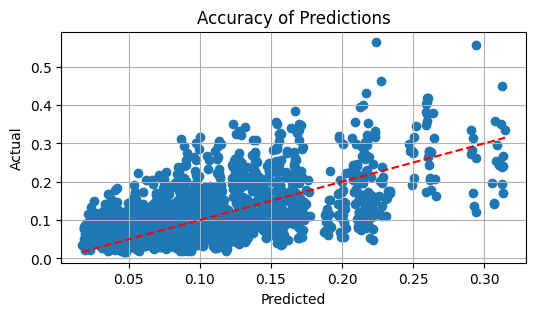




##### SIDE: front #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=4620.02, 	MAPE=0.6422, 	R^2=0.5495
2. vapour_height        	AIC=4522.88, 	MAPE=0.7488, 	R^2=0.5688
3. liquid_pct           	AIC=5491.24, 	MAPE=0.8787, 	R^2=0.3322
4. failure_pressure     	AIC=5077.39, 	MAPE=0.9074, 	R^2=0.4461
5. superheated_status   	AIC=5913.36, 	MAPE=0.9128, 	R^2=0.1920


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 4620.02, MAPE = 0.6422, R^2 = 0.5495):
1. superheated_status   	AIC=4589.22, 	MAPE=0.6417, 	R^2=0.5561
2. obstacle_dist        	AIC=4598.78, 	MAPE=0.6476, 	R^2=0.5542
3. liquid_pct           	AIC=4609.07, 	MAPE=0.6483, 	R^2=0.5521
4. net_sensor_dist      	AIC=4602.64, 	MAPE=0.6497, 	R^2=0.5534
5. substance            	AIC=4538.96, 	MAPE=0.6634, 	R^2=0.5660


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.6422 
AIC:	4620.02

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.549
Model:                            OLS   Adj. R-squared (uncentered):              0.549
Method:                 Least Squares   F-statistic:                              2699.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:48:16   Log-Likelihood:                         -2309.0
No. Observations:                2214   AIC:                                      4620.
Df Residuals:                    2213   BIC:                                      4626.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      

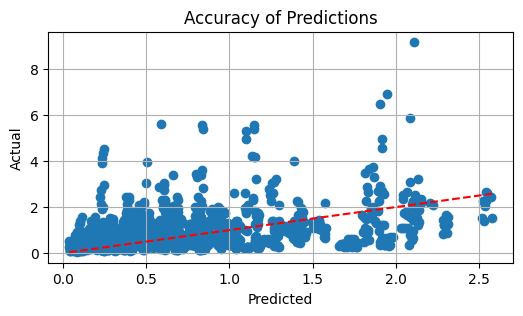




##### SIDE: side_L #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=361.59, 	MAPE=0.5547, 	R^2=0.6602
2. vapour_height        	AIC=286.51, 	MAPE=0.6113, 	R^2=0.6927
3. failure_pressure     	AIC=518.53, 	MAPE=0.7074, 	R^2=0.5805
4. ID                   	AIC=444.61, 	MAPE=0.7171, 	R^2=0.6201
5. obstacle_dist        	AIC=674.39, 	MAPE=0.7208, 	R^2=0.4829


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 361.59, MAPE = 0.5547, R^2 = 0.6602):
1. vapour_height        	AIC=9.12, 	MAPE=0.5031, 	R^2=0.7888
2. obstacle_dist        	AIC=305.12, 	MAPE=0.5234, 	R^2=0.6858
3. failure_pressure     	AIC=131.33, 	MAPE=0.5289, 	R^2=0.7512
4. substance            	AIC=310.42, 	MAPE=0.5328, 	R^2=0.6836
5. net_sensor_dist      	AIC=295.72, 	MAPE=0.5329, 	R^2=0.6898


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = 9.12, MAPE = 0.5031, R^2 = 0.7888):
1. substance            	AIC=2.51, 	MAPE=0.4996, 	R^2=0.7913
2. net_sensor_dist      	AIC=4.64, 	MAPE=0.5011, 	R^2=0.7907
3. superheated_status   	AIC=10.67, 	MAPE=0.5030, 	R^2=0.7890
4. obstacle_dist        	AIC=2.64, 	MAPE=0.5035, 	R^2=0.7912
5. obstacle_h           	AIC=8.95, 	MAPE=0.5070, 	R^2=0.7894


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.5031 
AIC:	9.12

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              1388.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                   1.25e-251
Time:                        14:48:19   Log-Likelihood:                         -2.5596
No. Observations:                 745   AIC:                                      9.119
Df Residuals:                     743   BIC:                                      18.35
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0

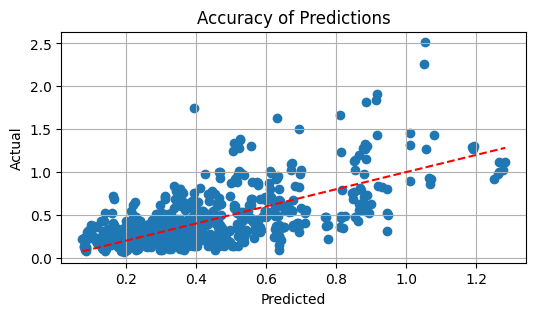




##### SIDE: side_T #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-804.39, 	MAPE=0.5131, 	R^2=0.7080
2. vapour_height        	AIC=-735.89, 	MAPE=0.6166, 	R^2=0.6797
3. failure_pressure     	AIC=-557.06, 	MAPE=0.6845, 	R^2=0.5923
4. ID                   	AIC=-646.70, 	MAPE=0.6872, 	R^2=0.6388
5. liquid_pct           	AIC=-374.16, 	MAPE=0.6892, 	R^2=0.4782


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -804.39, MAPE = 0.5131, R^2 = 0.7080):
1. vapour_height        	AIC=-1115.07, 	MAPE=0.4637, 	R^2=0.8085
2. failure_pressure     	AIC=-1048.02, 	MAPE=0.4738, 	R^2=0.7904
3. event_num            	AIC=-959.01, 	MAPE=0.4801, 	R^2=0.7637
4. ID                   	AIC=-1014.27, 	MAPE=0.4882, 	R^2=0.7806
5. obstacle_dist        	AIC=-905.31, 	MAPE=0.4885, 	R^2=0.7459


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -1115.07, MAPE = 0.4637, R^2 = 0.8085):
1. obstacle_h           	AIC=-1115.79, 	MAPE=0.4595, 	R^2=0.8092
2. substance            	AIC=-1127.74, 	MAPE=0.4624, 	R^2=0.8123
3. net_sensor_dist      	AIC=-1113.07, 	MAPE=0.4637, 	R^2=0.8085
4. obstacle_dist        	AIC=-1114.55, 	MAPE=0.4638, 	R^2=0.8089
5. superheated_status   	AIC=-1116.12, 	MAPE=0.4640, 	R^2=0.8093


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.4637 
AIC:	-1115.07

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              1560.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                   5.38e-266
Time:                        14:48:22   Log-Likelihood:                          559.54
No. Observations:                 741   AIC:                                     -1115.
Df Residuals:                     739   BIC:                                     -1106.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025   

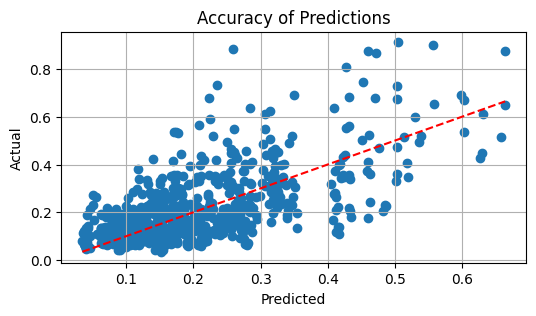




##### SIDE: side_R #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-979.20, 	MAPE=0.5305, 	R^2=0.6772
2. vapour_height        	AIC=-1088.27, 	MAPE=0.5442, 	R^2=0.7214
3. failure_pressure     	AIC=-841.07, 	MAPE=0.6363, 	R^2=0.6112
4. liquid_temp          	AIC=-1022.01, 	MAPE=0.6436, 	R^2=0.6953
5. vapour_temp          	AIC=-980.45, 	MAPE=0.6479, 	R^2=0.6778


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -979.20, MAPE = 0.5305, R^2 = 0.6772):
1. vapour_height        	AIC=-1392.60, 	MAPE=0.4280, 	R^2=0.8156
2. failure_pressure     	AIC=-1258.39, 	MAPE=0.4721, 	R^2=0.7790
3. obstacle_dist        	AIC=-1079.08, 	MAPE=0.4951, 	R^2=0.7186
4. obstacle_w           	AIC=-1055.24, 	MAPE=0.5002, 	R^2=0.7095
5. net_sensor_dist      	AIC=-1082.06, 	MAPE=0.5015, 	R^2=0.7198


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -1392.60, MAPE = 0.4280, R^2 = 0.8156):
1. substance            	AIC=-1412.49, 	MAPE=0.4248, 	R^2=0.8210
2. failure_pressure     	AIC=-1496.09, 	MAPE=0.4256, 	R^2=0.8400
3. obstacle_angle       	AIC=-1396.23, 	MAPE=0.4269, 	R^2=0.8170
4. superheated_status   	AIC=-1396.10, 	MAPE=0.4276, 	R^2=0.8170
5. net_sensor_dist      	AIC=-1391.02, 	MAPE=0.4279, 	R^2=0.8157


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.4280 
AIC:	-1392.60

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              1637.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                   2.13e-272
Time:                        14:48:23   Log-Likelihood:                          698.30
No. Observations:                 742   AIC:                                     -1393.
Df Residuals:                     740   BIC:                                     -1383.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025   

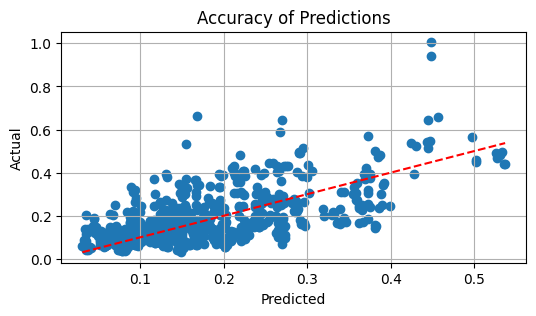

In [71]:
models = {}
side_dict = {1: "back", 2: "front", 3: "side_L", 4: "side_T", 5: "side_R"}

for side, df in grpd_sensor_side:
    print(f"\n##### SIDE: {side_dict[side]} #####\n")
    model_side = f"model_{side_dict[side]}" 
    model = forward_selected_mape(df, "tgt_pressure", criterion='aic', k=False)
    models[model_side] = model
    print("\n")

In [72]:
for model, (side, df) in zip(models.values(), grpd_sensor_side_vld):
    out_of_sample_test(model, df)

R^2: 0.1135, MAPE: 0.4616
R^2: -0.1179, MAPE: 0.6890
R^2: 0.2875, MAPE: 0.4292
R^2: 0.2700, MAPE: 0.4455
R^2: 0.1490, MAPE: 0.4196


In [73]:
for model, (side, df) in zip(models.values(), grpd_sensor_side_test):
    model.predict(df).clip(0)

In [ ]:
preds = [model.predict(df).clip(0) for model, (_, df) in zip(models.values(), grpd_sensor_side_test)]
preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

### Testing by Sensor

In [74]:
grpd_sensor = ft_data.groupby("sensor_id")
grpd_sensor_vld = validation_split.groupby("sensor_id")
grpd_sensor_tst = test_split.groupby("sensor_id")
grpd_sensor_test = raw_test_data3.groupby("sensor_id")


##### SIDE: 4.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-526.58, 	MAPE=0.5785, 	R^2=0.6833
2. vapour_height        	AIC=-518.33, 	MAPE=0.6677, 	R^2=0.6723
3. failure_pressure     	AIC=-445.06, 	MAPE=0.7712, 	R^2=0.5570
4. liquid_pct           	AIC=-385.37, 	MAPE=0.7876, 	R^2=0.4337
5. ID                   	AIC=-464.57, 	MAPE=0.7974, 	R^2=0.5912


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -526.58, MAPE = 0.5785, R^2 = 0.6833):
1. vapour_height        	AIC=-628.94, 	MAPE=0.5581, 	R^2=0.7939
2. superheated_status   	AIC=-534.74, 	MAPE=0.5726, 	R^2=0.6963
3. obstacle_h           	AIC=-539.68, 	MAPE=0.5726, 	R^2=0.7024
4. liquid_pct           	AIC=-528.21, 	MAPE=0.5749, 	R^2=0.6880
5. substance            	AIC=-539.34, 	MAPE=0.5756, 	R^2=0.7019


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -628.94, MAPE = 0.5581, R^2 = 0.7939):
1. net_sensor_dist      	AIC=-631.00, 	MAPE=0.5438, 	R^2=0.7973
2. obstacle_dist        	AIC=-631.94, 	MAPE=0.5441, 	R^2=0.7981
3. obstacle_angle       	AIC=-629.39, 	MAPE=0.5460, 	R^2=0.7959
4. obstacle_w           	AIC=-627.83, 	MAPE=0.5477, 	R^2=0.7946
5. obstacle_h           	AIC=-627.69, 	MAPE=0.5492, 	R^2=0.7945


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.5581 
AIC:	-628.94

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              464.1
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    2.27e-83
Time:                        14:49:00   Log-Likelihood:                          316.47
No. Observations:                 243   AIC:                                     -628.9
Df Residuals:                     241   BIC:                                     -622.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025    

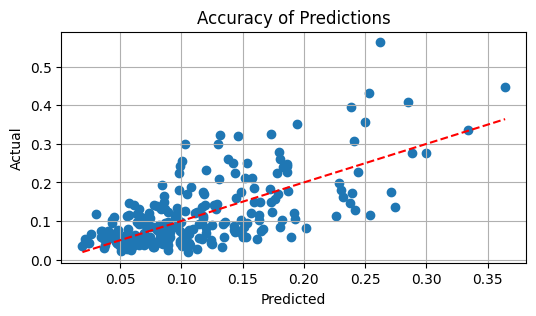




##### SIDE: 8.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-805.88, 	MAPE=0.5085, 	R^2=0.6903
2. vapour_height        	AIC=-831.32, 	MAPE=0.5142, 	R^2=0.7206
3. liquid_temp          	AIC=-819.35, 	MAPE=0.5661, 	R^2=0.7067
4. vapour_temp          	AIC=-804.79, 	MAPE=0.5715, 	R^2=0.6889
5. sensor_id            	AIC=-820.86, 	MAPE=0.5793, 	R^2=0.0000


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -805.88, MAPE = 0.5085, R^2 = 0.6903):
1. vapour_height        	AIC=-940.95, 	MAPE=0.3749, 	R^2=0.8222
2. failure_pressure     	AIC=-918.12, 	MAPE=0.4195, 	R^2=0.8050
3. vapour_temp          	AIC=-903.11, 	MAPE=0.4246, 	R^2=0.7927
4. liquid_temp          	AIC=-906.55, 	MAPE=0.4310, 	R^2=0.7956
5. sensor_location      	AIC=-907.44, 	MAPE=0.4345, 	R^2=0.3013


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -940.95, MAPE = 0.3749, R^2 = 0.8222):
1. substance            	AIC=-956.02, 	MAPE=0.3637, 	R^2=0.8340
2. net_sensor_dist      	AIC=-941.54, 	MAPE=0.3692, 	R^2=0.8240
3. BLEVE_h              	AIC=-944.89, 	MAPE=0.3692, 	R^2=0.8264
4. obstacle_dist        	AIC=-941.06, 	MAPE=0.3692, 	R^2=0.8237
5. failure_pressure     	AIC=-992.48, 	MAPE=0.3704, 	R^2=0.8568


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.3749 
AIC:	-940.95

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.821
Method:                 Least Squares   F-statistic:                              566.3
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    1.34e-92
Time:                        14:49:03   Log-Likelihood:                          472.47
No. Observations:                 247   AIC:                                     -940.9
Df Residuals:                     245   BIC:                                     -933.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025    

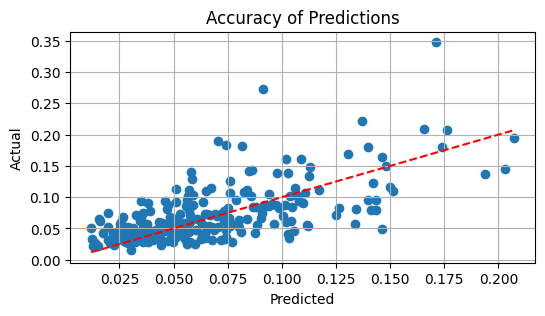




##### SIDE: 12.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=308.97, 	MAPE=0.5604, 	R^2=0.6809
2. vapour_height        	AIC=349.36, 	MAPE=0.7400, 	R^2=0.6237
3. liquid_pct           	AIC=464.00, 	MAPE=0.7697, 	R^2=0.3991
4. event_num            	AIC=432.95, 	MAPE=0.8190, 	R^2=0.4707
5. ID                   	AIC=389.87, 	MAPE=0.8243, 	R^2=0.5560


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 308.97, MAPE = 0.5604, R^2 = 0.6809):
1. superheated_status   	AIC=304.06, 	MAPE=0.5525, 	R^2=0.6897
2. liquid_pct           	AIC=309.62, 	MAPE=0.5532, 	R^2=0.6826
3. obstacle_h           	AIC=305.89, 	MAPE=0.5549, 	R^2=0.6874
4. net_sensor_dist      	AIC=303.14, 	MAPE=0.5556, 	R^2=0.6909
5. obstacle_dist        	AIC=302.10, 	MAPE=0.5580, 	R^2=0.6922


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.5604 
AIC:	308.97

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.680
Method:                 Least Squares   F-statistic:                              520.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    1.89e-62
Time:                        14:49:07   Log-Likelihood:                         -153.49
No. Observations:                 245   AIC:                                      309.0
Df Residuals:                     244   BIC:                                      312.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0

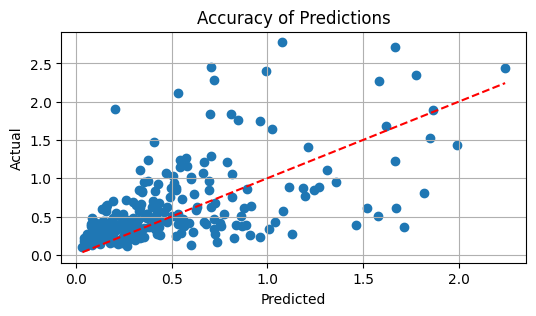




##### SIDE: 16.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. vapour_height        	AIC=354.73, 	MAPE=0.5884, 	R^2=0.6711
2. tank_volume          	AIC=420.77, 	MAPE=0.6421, 	R^2=0.5698
3. obstacle_h           	AIC=481.41, 	MAPE=0.7841, 	R^2=0.4495
4. failure_pressure     	AIC=444.63, 	MAPE=0.8030, 	R^2=0.5260
5. obstacle_thk         	AIC=468.96, 	MAPE=0.8240, 	R^2=0.4767


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = 354.73, MAPE = 0.5884, R^2 = 0.6711):
1. tank_volume          	AIC=308.82, 	MAPE=0.5602, 	R^2=0.7293
2. superheated_status   	AIC=356.69, 	MAPE=0.5873, 	R^2=0.6711
3. obstacle_w           	AIC=356.72, 	MAPE=0.5880, 	R^2=0.6711
4. obstacle_angle       	AIC=356.51, 	MAPE=0.5912, 	R^2=0.6714
5. substance            	AIC=346.97, 	MAPE=0.5924, 	R^2=0.6839


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 308.82, MAPE = 0.5602, R^2 = 0.7293):
1. obstacle_angle       	AIC=309.08, 	MAPE=0.5426, 	R^2=0.7312
2. obstacle_w           	AIC=306.96, 	MAPE=0.5524, 	R^2=0.7335
3. superheated_status   	AIC=309.96, 	MAPE=0.5605, 	R^2=0.7302
4. substance            	AIC=307.97, 	MAPE=0.5672, 	R^2=0.7324
5. BLEVE_h              	AIC=309.90, 	MAPE=0.5687, 	R^2=0.7303


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.5602 
AIC:	308.82

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.729
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              328.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    5.87e-70
Time:                        14:49:11   Log-Likelihood:                         -152.41
No. Observations:                 246   AIC:                                      308.8
Df Residuals:                     244   BIC:                                      315.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025     

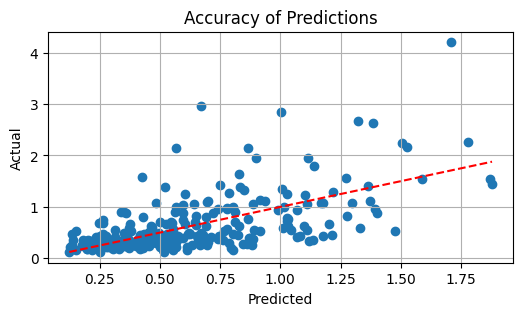




##### SIDE: 20.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=135.28, 	MAPE=0.5521, 	R^2=0.6613
2. vapour_height        	AIC=99.97, 	MAPE=0.5805, 	R^2=0.7058
3. obstacle_dist        	AIC=238.32, 	MAPE=0.6901, 	R^2=0.4894
4. failure_pressure     	AIC=181.35, 	MAPE=0.6956, 	R^2=0.5931
5. ID                   	AIC=157.10, 	MAPE=0.6982, 	R^2=0.6306


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 135.28, MAPE = 0.5521, R^2 = 0.6613):
1. vapour_height        	AIC=5.67, 	MAPE=0.4837, 	R^2=0.7995
2. obstacle_dist        	AIC=116.76, 	MAPE=0.5104, 	R^2=0.6879
3. failure_pressure     	AIC=52.26, 	MAPE=0.5153, 	R^2=0.7586
4. net_sensor_dist      	AIC=112.60, 	MAPE=0.5175, 	R^2=0.6930
5. substance            	AIC=119.54, 	MAPE=0.5181, 	R^2=0.6844


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = 5.67, MAPE = 0.4837, R^2 = 0.7995):
1. substance            	AIC=5.18, 	MAPE=0.4812, 	R^2=0.8015
2. superheated_status   	AIC=7.25, 	MAPE=0.4835, 	R^2=0.7999
3. net_sensor_dist      	AIC=5.57, 	MAPE=0.4840, 	R^2=0.8012
4. failure_pressure     	AIC=-21.34, 	MAPE=0.4850, 	R^2=0.8214
5. liquid_pct           	AIC=6.10, 	MAPE=0.4854, 	R^2=0.8008


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.4837 
AIC:	5.67

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                              496.5
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                    1.28e-87
Time:                        14:49:26   Log-Likelihood:                        -0.83646
No. Observations:                 251   AIC:                                      5.673
Df Residuals:                     249   BIC:                                      12.72
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0

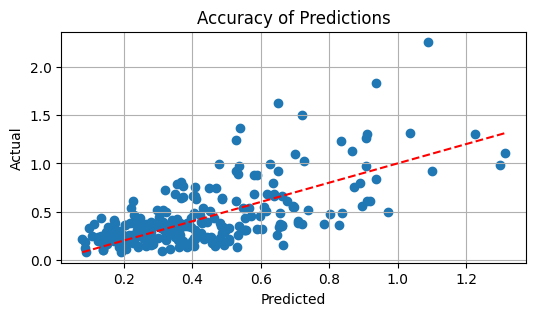




##### SIDE: 24.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-408.14, 	MAPE=0.4991, 	R^2=0.7318
2. vapour_height        	AIC=-399.69, 	MAPE=0.5561, 	R^2=0.7225
3. liquid_temp          	AIC=-394.05, 	MAPE=0.6317, 	R^2=0.7161
4. failure_pressure     	AIC=-324.39, 	MAPE=0.6337, 	R^2=0.6236
5. ID                   	AIC=-364.67, 	MAPE=0.6400, 	R^2=0.6802


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -408.14, MAPE = 0.4991, R^2 = 0.7318):
1. vapour_height        	AIC=-545.01, 	MAPE=0.4061, 	R^2=0.8472
2. failure_pressure     	AIC=-514.33, 	MAPE=0.4258, 	R^2=0.8269
3. event_num            	AIC=-476.56, 	MAPE=0.4471, 	R^2=0.7983
4. ID                   	AIC=-501.68, 	MAPE=0.4472, 	R^2=0.8178
5. vapour_temp          	AIC=-503.18, 	MAPE=0.4493, 	R^2=0.8189


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -545.01, MAPE = 0.4061, R^2 = 0.8472):
1. failure_pressure     	AIC=-590.04, 	MAPE=0.3926, 	R^2=0.8737
2. substance            	AIC=-550.34, 	MAPE=0.4023, 	R^2=0.8516
3. obstacle_dist        	AIC=-544.23, 	MAPE=0.4038, 	R^2=0.8479
4. BLEVE_h              	AIC=-545.13, 	MAPE=0.4041, 	R^2=0.8485
5. obstacle_w           	AIC=-544.64, 	MAPE=0.4043, 	R^2=0.8482


Variable to add (1-5):  1



### Adding failure_pressure ###

Best variables (current: AIC = -590.04, MAPE = 0.3926, R^2 = 0.8737):
1. net_sensor_dist      	AIC=-625.92, 	MAPE=0.3417, 	R^2=0.8916
2. obstacle_dist        	AIC=-609.95, 	MAPE=0.3598, 	R^2=0.8844
3. obstacle_h           	AIC=-614.15, 	MAPE=0.3604, 	R^2=0.8863
4. obstacle_angle       	AIC=-609.84, 	MAPE=0.3691, 	R^2=0.8843
5. BLEVE_h              	AIC=-597.42, 	MAPE=0.3721, 	R^2=0.8784


Variable to add (1-5):  1



### Adding net_sensor_dist ###

Best variables (current: AIC = -625.92, MAPE = 0.3417, R^2 = 0.8916):
1. superheated_status   	AIC=-673.87, 	MAPE=0.3152, 	R^2=0.9115
2. substance            	AIC=-625.08, 	MAPE=0.3357, 	R^2=0.8921
3. liquid_temp          	AIC=-663.08, 	MAPE=0.3377, 	R^2=0.9075
4. vapour_temp          	AIC=-641.45, 	MAPE=0.3397, 	R^2=0.8990
5. liquid_pct           	AIC=-625.27, 	MAPE=0.3401, 	R^2=0.8922


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.3417 
AIC:	-625.92

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              499.8
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                   6.12e-116
Time:                        14:49:38   Log-Likelihood:                          316.96
No. Observations:                 247   AIC:                                     -625.9
Df Residuals:                     243   BIC:                                     -611.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025 

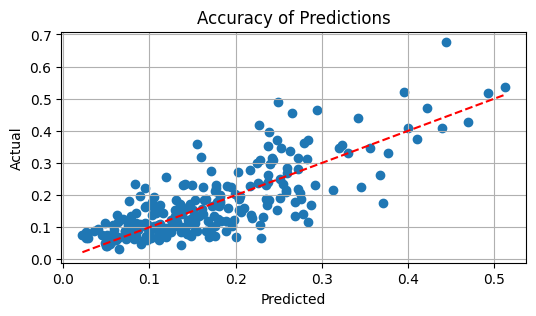

In [75]:
models = {}

for side, df in grpd_sensor:
    if side % 4 == 0:
        print(f"\n##### SIDE: {side} #####\n")
        model_side = f"model_{side}" 
        model = forward_selected_mape(df, "tgt_pressure", criterion='aic', k=False)
        models[model_side] = model
        print("\n")

In [76]:
sensor10 = ft_data.query("sensor_id == 10")

In [77]:
temp = sensor10.sort_values("tgt_pressure", ascending = False).round(2).drop(columns = ["ID", "event_num", "BLEVE_h", "obstacle_angle", "sensor_side", "sensor_id", "sensor_location"]).reset_index(drop = True)

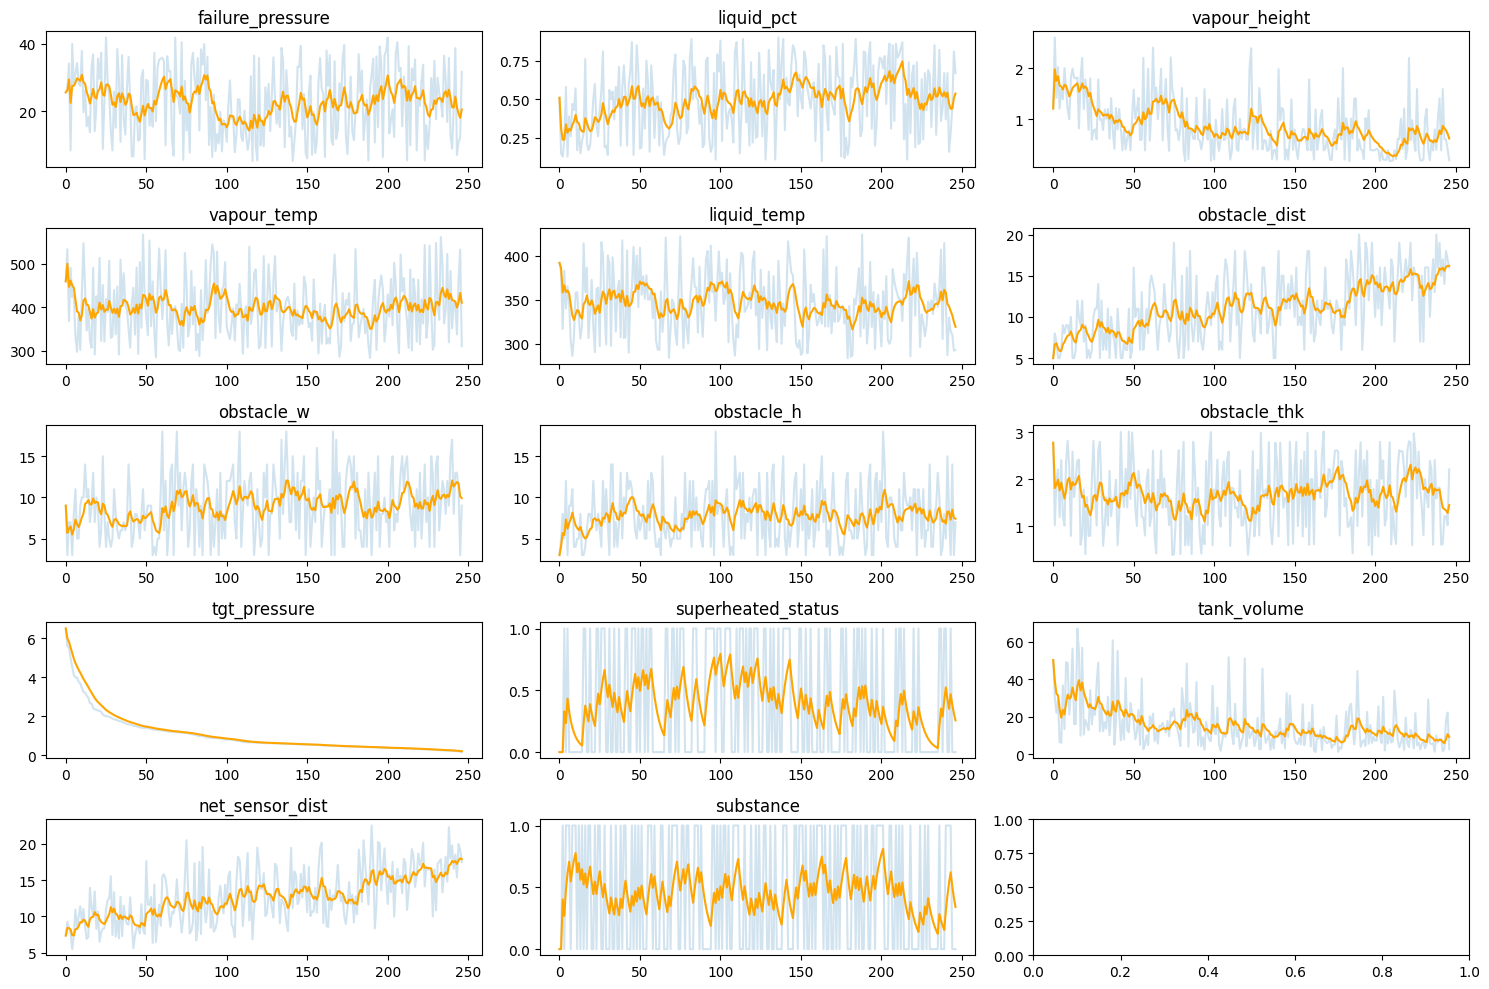

In [78]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(temp.columns):
    ax = axes[i]
    ax.plot(temp.index, temp[column], alpha = 0.2)
    ewma = temp[column].ewm(span=10).mean()
    ax.plot(temp.index, ewma, label='EWMA', color='orange')
    ax.set_title(column)

plt.tight_layout()
plt.show()


In [79]:
models = {}

m1 = ["tank_volume", "vapour_height", "net_sensor_dist", "failure_pressure"]
m2 = ["tank_volume", "vapour_height"]
m3 = ["tank_volume", "vapour_height"]

for side, df in grpd_sensor:
    if side <= 9:
        model_side = f"model_{int(side)}" 
        temp_formula = f"tgt_pressure ~ {' + '.join(m1)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model
        
    elif side <= 15:
        model_side = f"model_{int(side)}" 
        temp_formula = f"tgt_pressure ~ {' + '.join(m2)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model

    else:
        model_side = f"model_{int(side)}" 
    
        temp_formula = f"tgt_pressure ~ {' + '.join(m3)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model

In [107]:
for model, (side, df) in zip(models.values(), grpd_sensor_vld):
    if side in [10,16]:
        print("\n")
    out_of_sample_test(model, df)

R^2: 0.4567, MAPE: 0.2446
R^2: 0.2891, MAPE: 0.2717
R^2: 0.4386, MAPE: 0.3157
R^2: 0.6037, MAPE: 0.3944
R^2: 0.5777, MAPE: 0.4073
R^2: 0.2358, MAPE: 0.3460
R^2: 0.5253, MAPE: 0.2909
R^2: 0.4294, MAPE: 0.3095
R^2: 0.5727, MAPE: 0.3183


R^2: 0.2878, MAPE: 0.6463
R^2: 0.3660, MAPE: 0.5064
R^2: 0.4084, MAPE: 0.5582
R^2: 0.1528, MAPE: 0.7245
R^2: 0.1341, MAPE: 0.5423
R^2: 0.1267, MAPE: 0.5524


R^2: 0.2483, MAPE: 0.5222
R^2: 0.2766, MAPE: 0.4626
R^2: 0.3540, MAPE: 0.4848
R^2: 0.2818, MAPE: 0.4366
R^2: 0.2962, MAPE: 0.3787
R^2: 0.3817, MAPE: 0.4001
R^2: 0.3825, MAPE: 0.4160
R^2: 0.1753, MAPE: 0.4515
R^2: 0.3249, MAPE: 0.3806
R^2: 0.1259, MAPE: 0.4366
R^2: 0.0483, MAPE: 0.4185
R^2: 0.2996, MAPE: 0.3900


In [81]:
for model, (side, df) in zip(models.values(), grpd_sensor_test):
    model.predict(df).clip(0)

In [ ]:
preds = [model.predict(df).clip(0) for model, (_, df) in zip(models.values(), grpd_sensor_test)]
preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

In [82]:
coefficients_df = pd.DataFrame()

for i, model in enumerate(models.values()):
    coefficients = model.params
    coefficients_df[f'{i+1}'] = coefficients

coefficients_df = coefficients_df.T
coefficients_df.index = coefficients_df.index.astype(int)

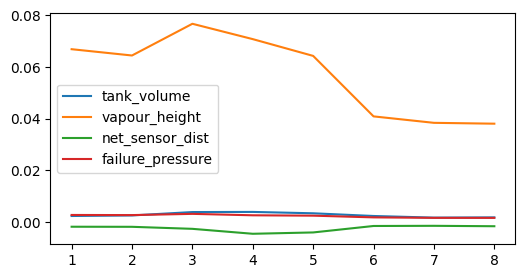

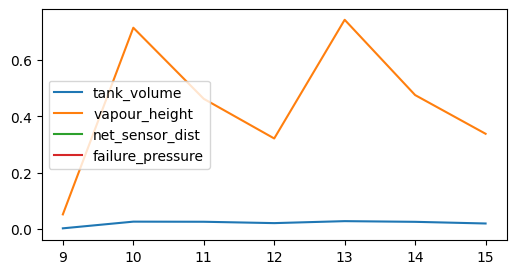

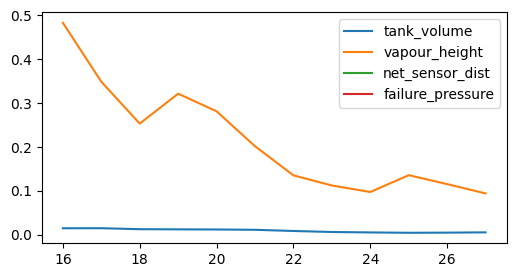

In [83]:
first_range = coefficients_df[coefficients_df.index < 9]
second_range = coefficients_df[(coefficients_df.index >= 9) & (coefficients_df.index <= 15)]
third_range = coefficients_df[coefficients_df.index > 15]

plt.figure(figsize=(6, 3))
for column in first_range.columns:
    plt.plot(first_range.index, first_range[column], label=column)
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
for column in second_range.columns:
    plt.plot(second_range.index, second_range[column], label=column)
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
for column in third_range.columns:
    plt.plot(third_range.index, third_range[column], label=column)
plt.legend()
plt.show()


In [84]:
ft_data2 = ft_data.copy()

In [144]:
# Implement standarisation
# df.dtypes --> check nums are nums (for erroneous vals)

# ML Implementation

In [96]:
# Use ReLU activation (or leaky ReLU if many neurons die)
# Hyperparams: grid search. Bayesian optimisation w ray tune and optuna

In [100]:
# Implement: RF, XGB, NN

## Random Forest

### Data Preparation

In [174]:
dfs = ["grpd_sensor",
"grpd_sensor_vld", 
"grpd_sensor_tst",
"grpd_sensor_test"]

In [182]:
x_data = ft_data.copy()

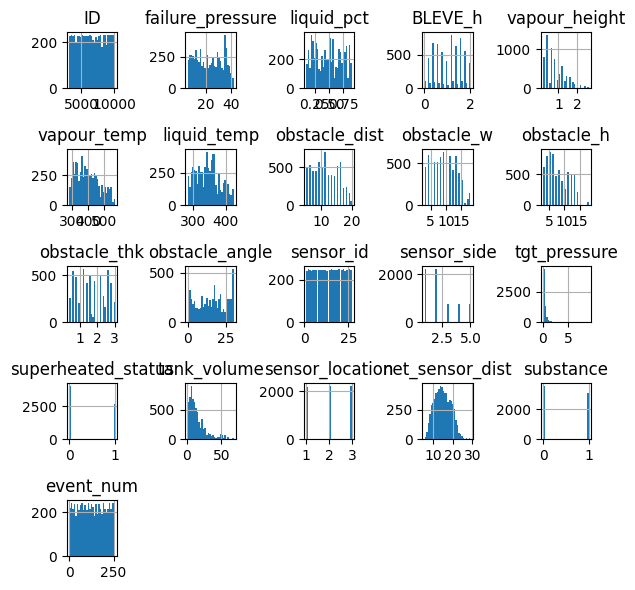

In [184]:
x_data.hist(bins = 30, figsize = (6,6))
plt.tight_layout()
plt.show()

Unnecessary data points:
* ID
* obstacle_w
* obstacle_h
* obstacle_thk

In [ ]:
grpd_sensor = ft_data.groupby("sensor_id")
grpd_sensor_vld = validation_split.groupby("sensor_id")
grpd_sensor_tst = test_split.groupby("sensor_id")
grpd_sensor_test = raw_test_data3.groupby("sensor_id")

In [180]:
X_train = list(grpd_sensor)[0][1]

,ID,failure_pressure,liquid_pct,BLEVE_h,vapour_height,vapour_temp,liquid_temp,obstacle_dist,obstacle_w,obstacle_h,...,obstacle_angle,sensor_id,sensor_side,tgt_pressure,superheated_status,tank_volume,sensor_location,net_sensor_dist,substance,event_num
10,3213.0,30.67,0.81,1.19,0.18,362.88,407.79,9.0,4.0,14.0,...,16.0,1.0,1.0,0.112700,0,5.574240,1,11.117851,0,2
37,3240.0,24.11,0.66,1.60,0.19,461.49,363.16,17.0,6.0,6.0,...,14.0,1.0,1.0,0.076563,0,18.171192,1,20.336482,0,3
64,3267.0,26.94,0.80,1.59,0.40,306.82,294.21,8.0,10.0,13.0,...,4.0,1.0,1.0,0.091995,0,13.327524,1,12.424919,1,4
91,3294.0,36.55,0.58,1.41,0.60,411.45,313.13,5.0,6.0,7.0,...,2.0,1.0,1.0,0.146644,0,10.197880,1,9.307556,1,5
118,3321.0,20.05,0.59,0.98,0.40,386.04,307.00,11.0,12.0,12.0,...,30.0,1.0,1.0,0.116180,0,10.508580,1,13.904780,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,10017.0,27.47,0.10,0.18,1.21,329.45,323.23,8.0,9.0,15.0,...,16.0,1.0,1.0,0.098199,0,0.982520,1,11.176802,1,254
6841,10044.0,17.87,0.31,1.41,0.59,397.29,396.35,7.0,14.0,11.0,...,30.0,1.0,1.0,0.112519,1,1.811940,1,9.455718,0,255
6868,10071.0,6.51,0.73,1.39,0.59,406.99,325.83,12.0,9.0,6.0,...,4.0,1.0,1.0,0.083669,1,26.475800,1,15.719561,1,256
6895,10098.0,26.34,0.31,0.21,2.02,439.74,329.82,5.0,14.0,5.0,...,13.0,1.0,1.0,0.261633,0,55.654298,1,10.795675,1,257


### Initial Model

In [172]:
rf_model = RandomForestRegressor()